In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from env import get_db_url

In [2]:
def new_log_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM logs JOIN cohorts ON logs.user_id = cohorts.id'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('curriculum_logs'))
    
    return df


In [3]:
df = new_log_data()
df.head()

date      time                                 path  user_id  \
0  2018-01-26  09:55:03                                    /        1   
1  2018-01-26  09:56:02                              java-ii        1   
2  2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
3  2018-01-26  09:56:06   slides/object_oriented_programming        1   
4  2018-01-26  09:56:24            javascript-i/conditionals        2   

   cohort_id            ip  id      name      slack  start_date    end_date  \
0        8.0  97.105.19.61   1    Arches    #arches  2014-02-04  2014-04-22   
1        8.0  97.105.19.61   1    Arches    #arches  2014-02-04  2014-04-22   
2        8.0  97.105.19.61   1    Arches    #arches  2014-02-04  2014-04-22   
3        8.0  97.105.19.61   1    Arches    #arches  2014-02-04  2014-04-22   
4       22.0  97.105.19.61   2  Badlands  #badlands  2014-06-04  2014-08-22   

            created_at           updated_at deleted_at  program_id  
0  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
1  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
2  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
3  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
4  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1

In [4]:
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [5]:
df.head()

date      time                                 path  user_id  \
date                                                                            
2018-01-26 2018-01-26  09:55:03                                    /        1   
2018-01-26 2018-01-26  09:56:02                              java-ii        1   
2018-01-26 2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 2018-01-26  09:56:06   slides/object_oriented_programming        1   
2018-01-26 2018-01-26  09:56:24            javascript-i/conditionals        2   

            cohort_id            ip  id      name      slack  start_date  \
date                                                                       
2018-01-26        8.0  97.105.19.61   1    Arches    #arches  2014-02-04   
2018-01-26        8.0  97.105.19.61   1    Arches    #arches  2014-02-04   
2018-01-26        8.0  97.105.19.61   1    Arches    #arches  2014-02-04   
2018-01-26        8.0  97.105.19.61   1    Arches    #arches  2014-02-04   
2018-01-26       22.0  97.105.19.61   2  Badlands  #badlands  2014-06-04   

              end_date           created_at           updated_at deleted_at  \
date                                                                          
2018-01-26  2014-04-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2014-04-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2014-04-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2014-04-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2014-08-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   

            program_id  
date                    
2018-01-26           1  
2018-01-26           1  
2018-01-26           1  
2018-01-26           1  
2018-01-26           1

In [6]:
df = df.drop(columns=['id', 'slack'])

In [7]:
df.head()

date      time                                 path  user_id  \
date                                                                            
2018-01-26 2018-01-26  09:55:03                                    /        1   
2018-01-26 2018-01-26  09:56:02                              java-ii        1   
2018-01-26 2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 2018-01-26  09:56:06   slides/object_oriented_programming        1   
2018-01-26 2018-01-26  09:56:24            javascript-i/conditionals        2   

            cohort_id            ip      name  start_date    end_date  \
date                                                                    
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26       22.0  97.105.19.61  Badlands  2014-06-04  2014-08-22   

                     created_at           updated_at deleted_at  program_id  
date                                                                         
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1  
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1

In [8]:
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    435
2018-01-27    165
2018-01-28    144
2018-01-29    642
2018-01-30    475
Freq: D, Name: path, dtype: int64

In [30]:
def find_program(df):
    if df['program_id'] == 2:
        val = 'data-science'
    elif df['program_id']  == 1:
        val = 'web_dev'
    elif df['program_id']  == 4:
        val = 'instructor'
    elif df['program_id']  == 3:
        val = 'instructor'
    
    return val

df['program_name'] = df.apply(find_program, axis=1)
df.head()

date      time                                 path  user_id  \
date                                                                            
2018-01-26 2018-01-26  09:55:03                                    /        1   
2018-01-26 2018-01-26  09:56:02                              java-ii        1   
2018-01-26 2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 2018-01-26  09:56:06   slides/object_oriented_programming        1   
2018-01-26 2018-01-26  09:56:24            javascript-i/conditionals        2   

            cohort_id            ip      name  start_date    end_date  \
date                                                                    
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26       22.0  97.105.19.61  Badlands  2014-06-04  2014-08-22   

                     created_at           updated_at deleted_at  program_id  \
date                                                                          
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1   
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1   
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1   
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1   
2018-01-26  2016-06-14 19:52:26  2016-06-14 19:52:26       None           1   

           program_name  
date                     
2018-01-26      web_dev  
2018-01-26      web_dev  
2018-01-26      web_dev  
2018-01-26      web_dev  
2018-01-26      web_dev

In [10]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['path'].resample('d').count()
    return pages_one_user

In [11]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [12]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [13]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

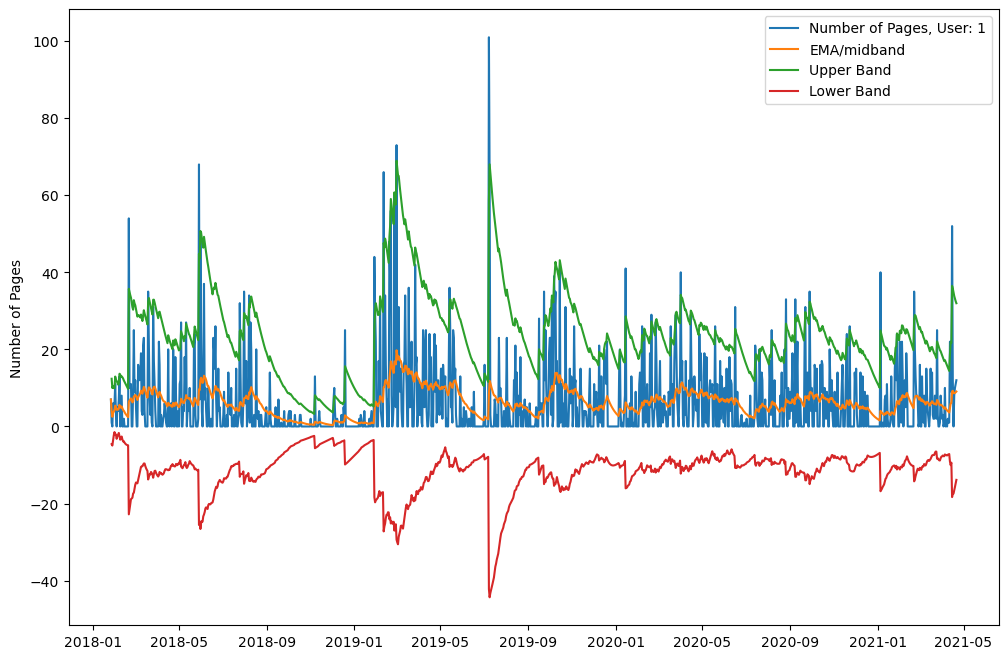

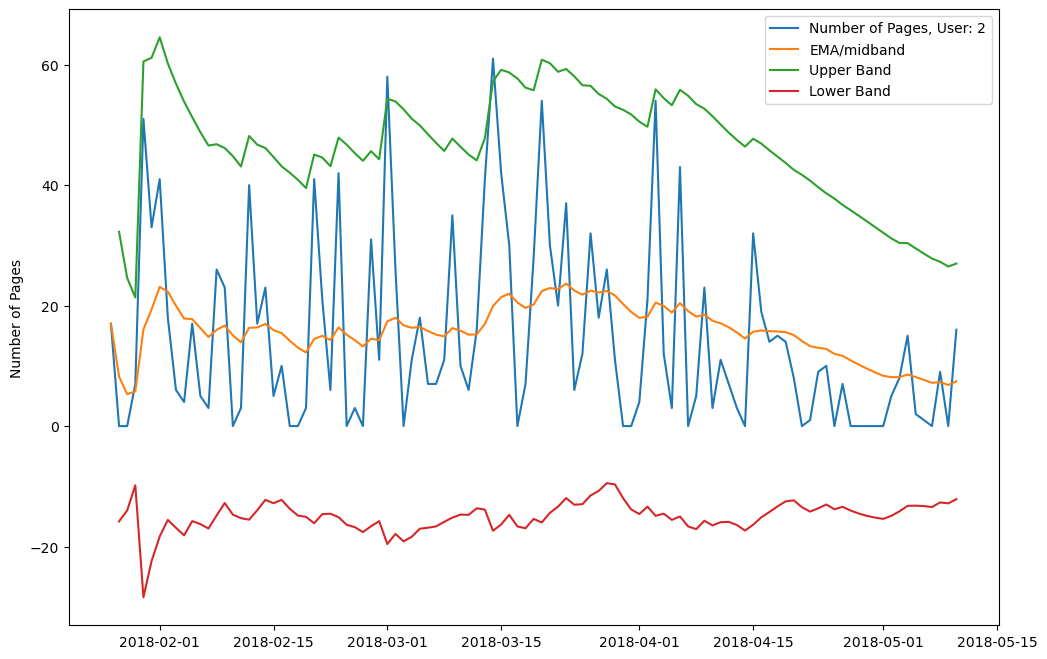

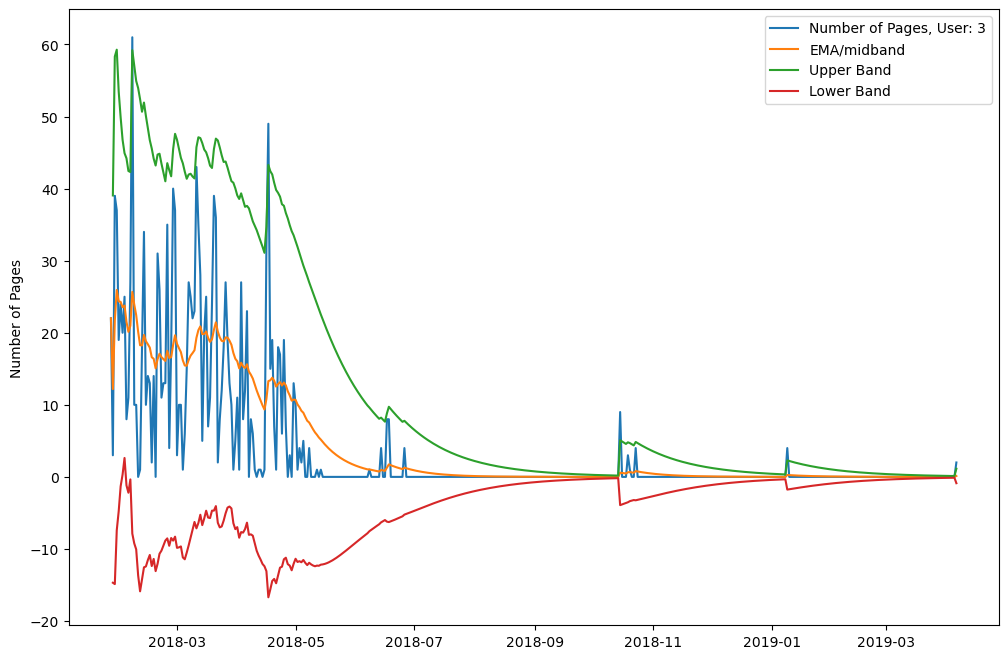

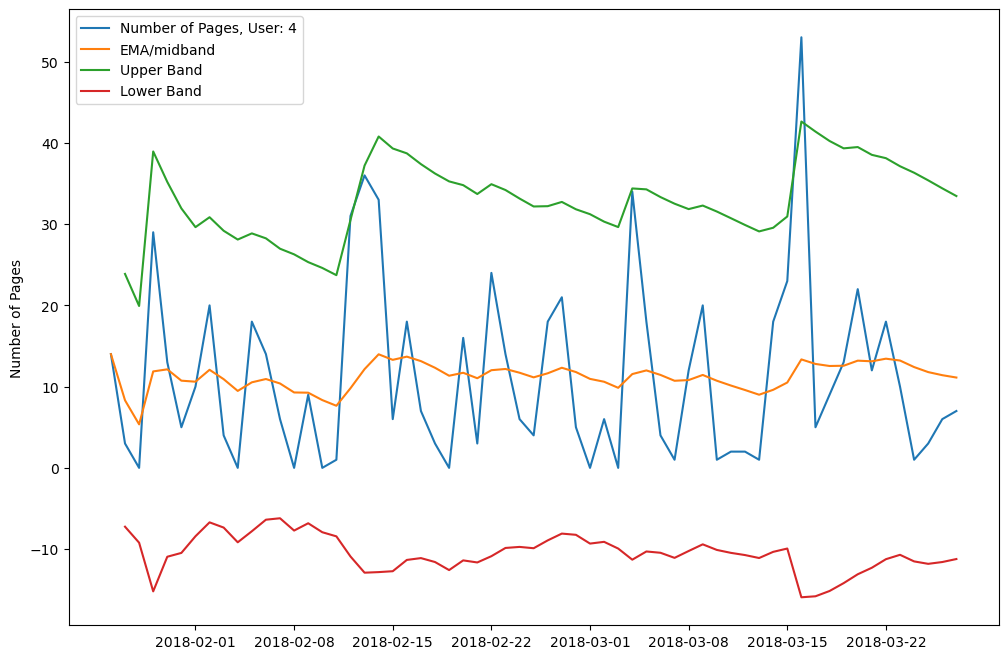

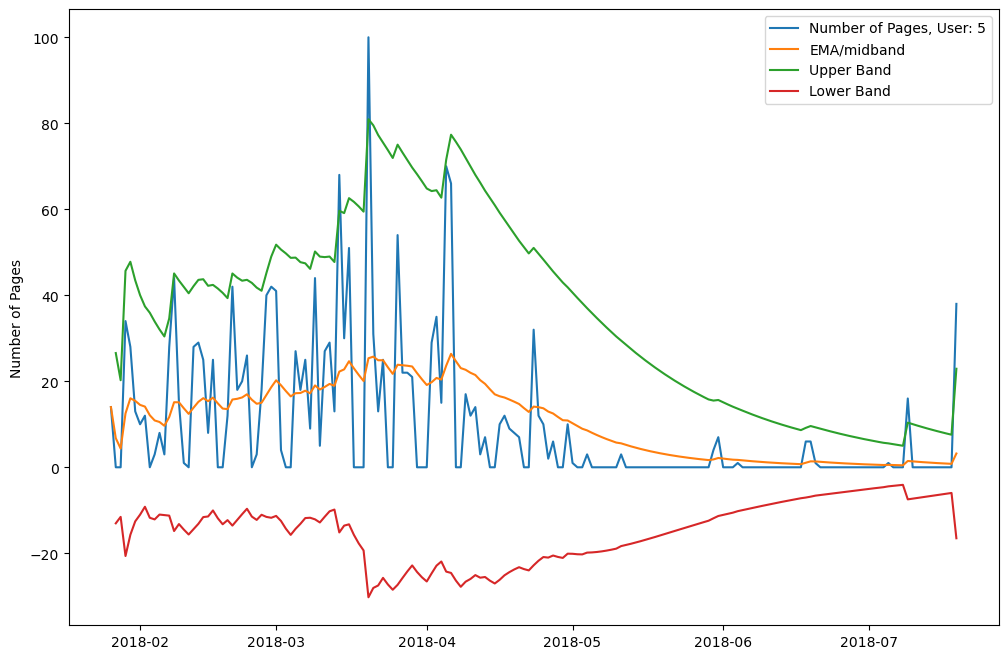

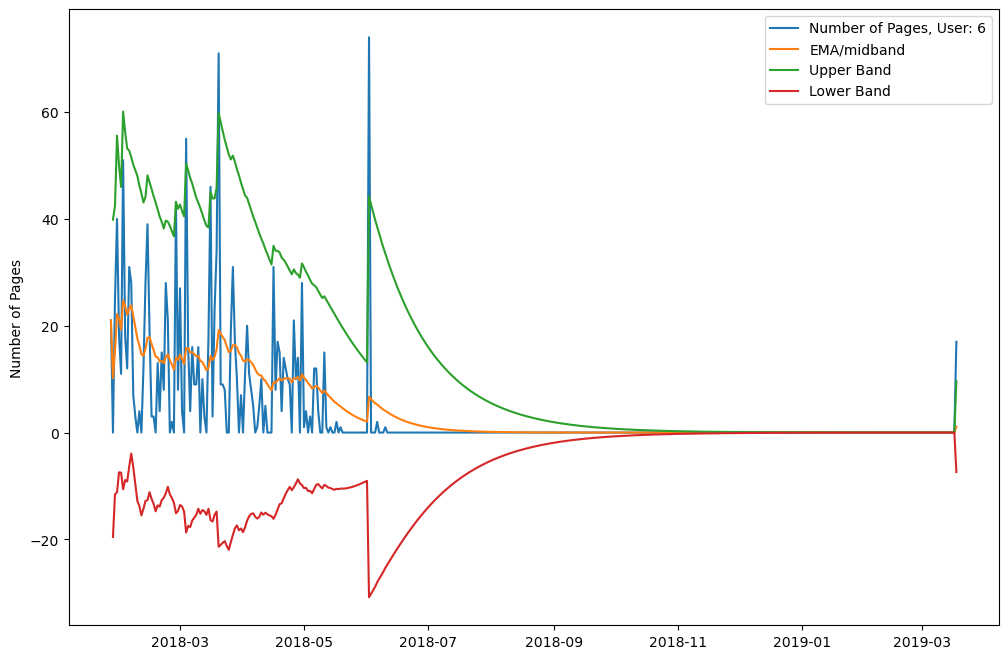

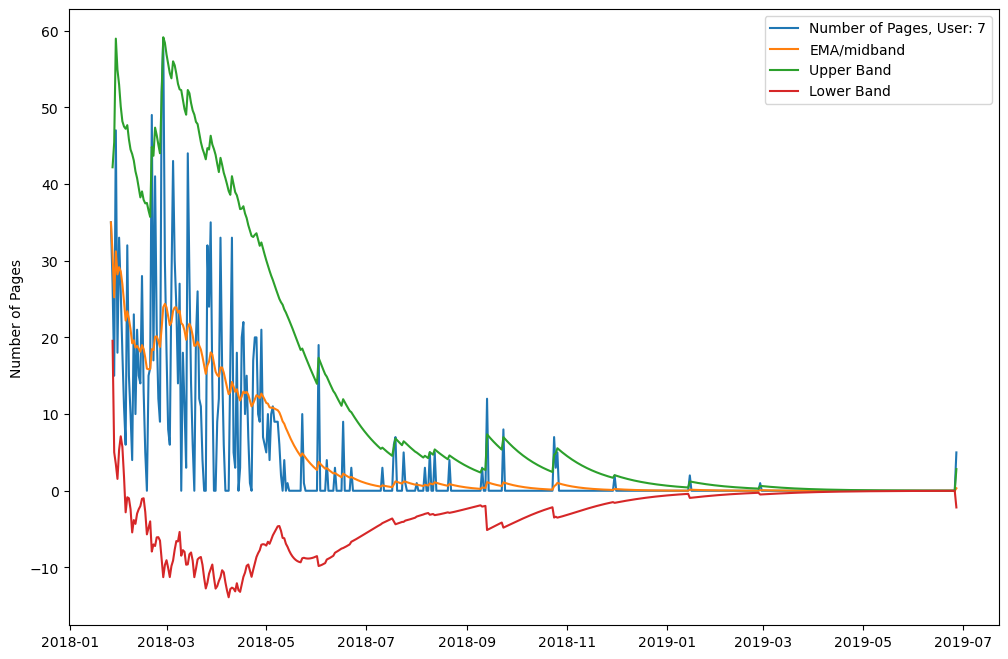

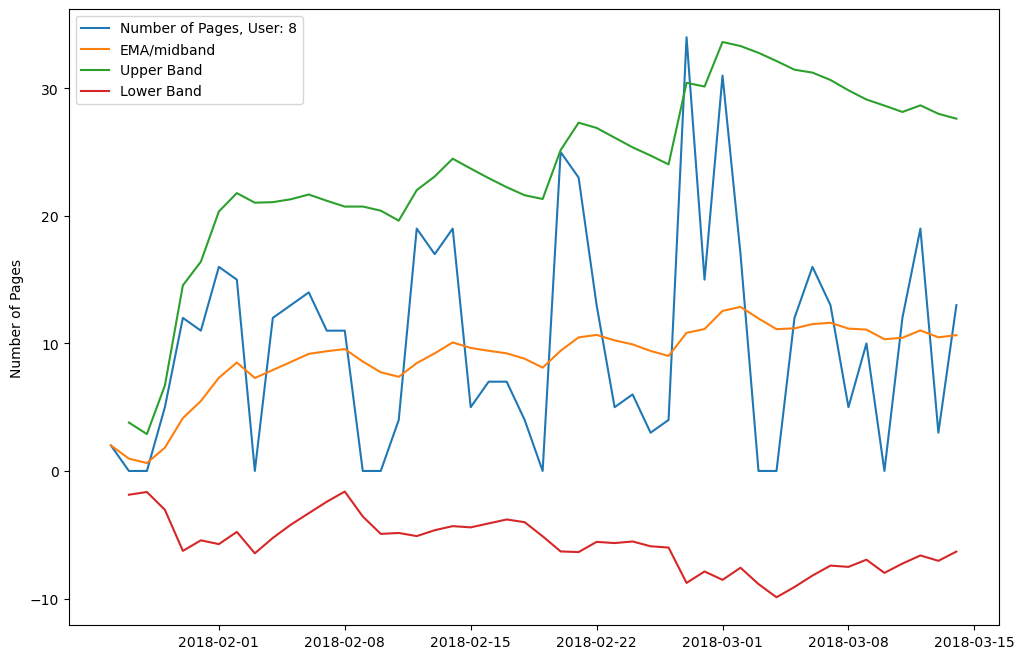

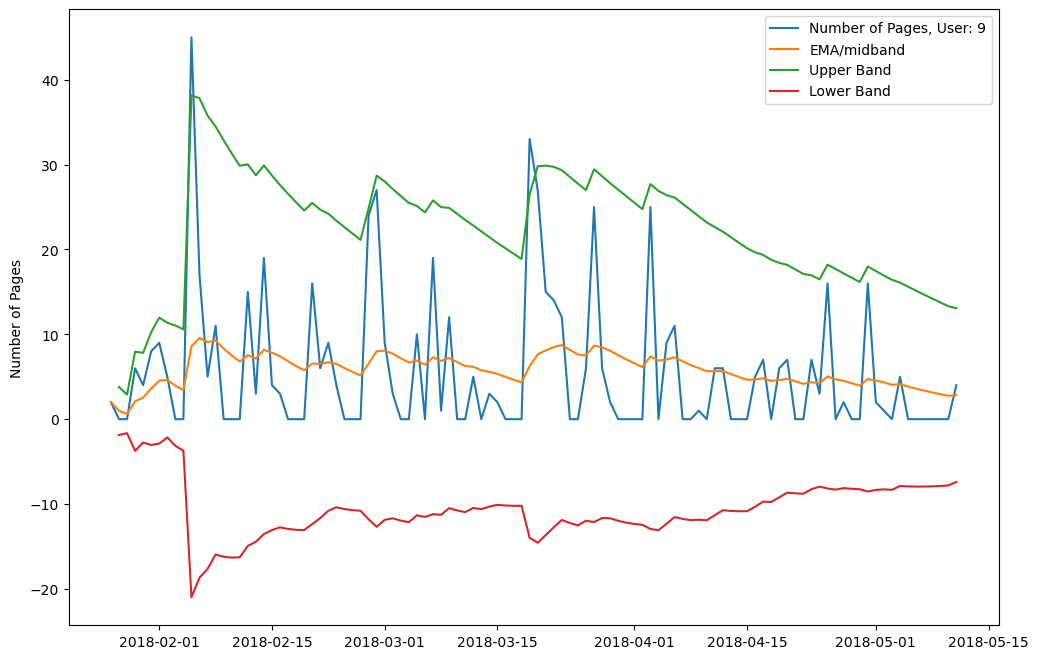

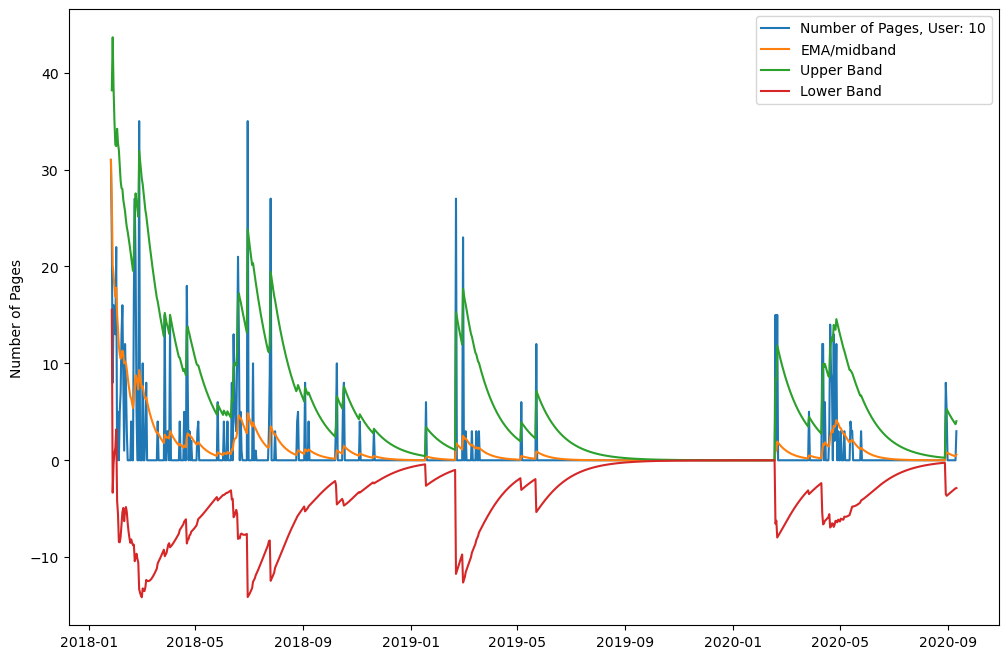

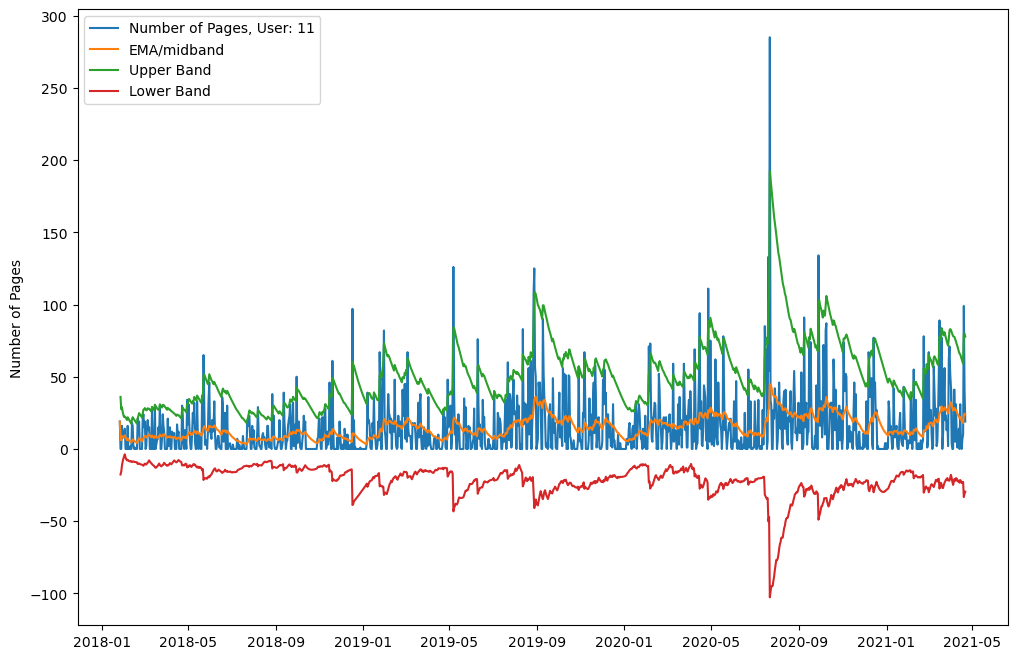

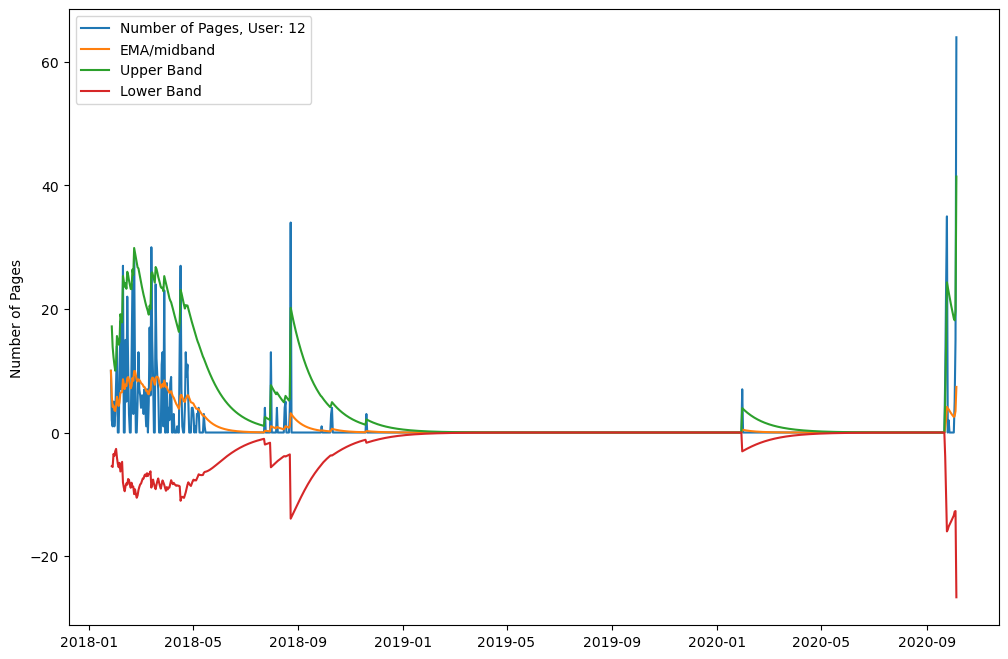

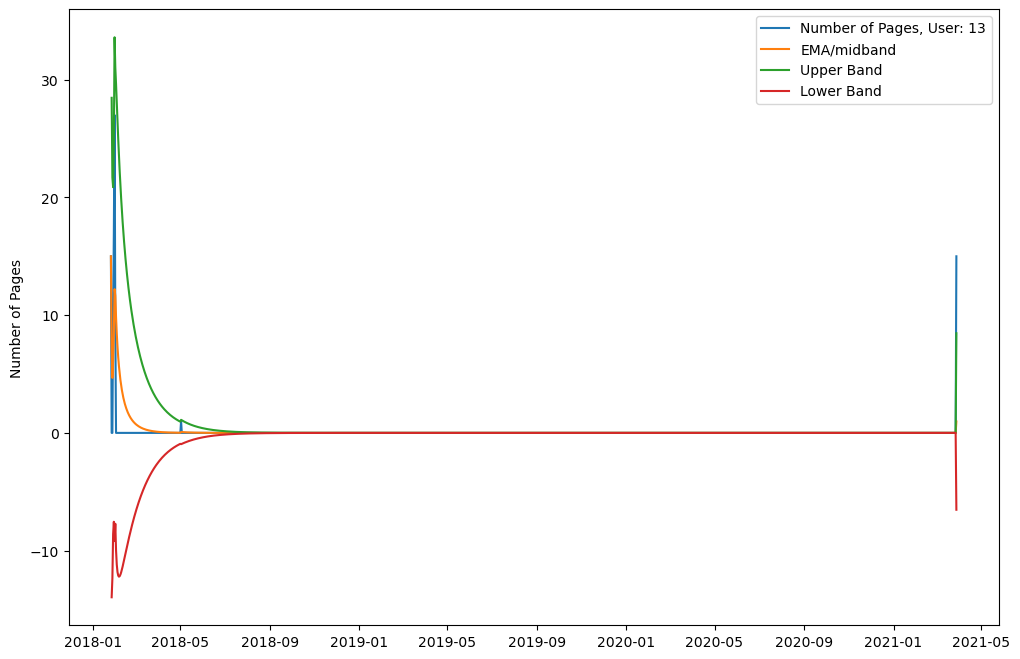

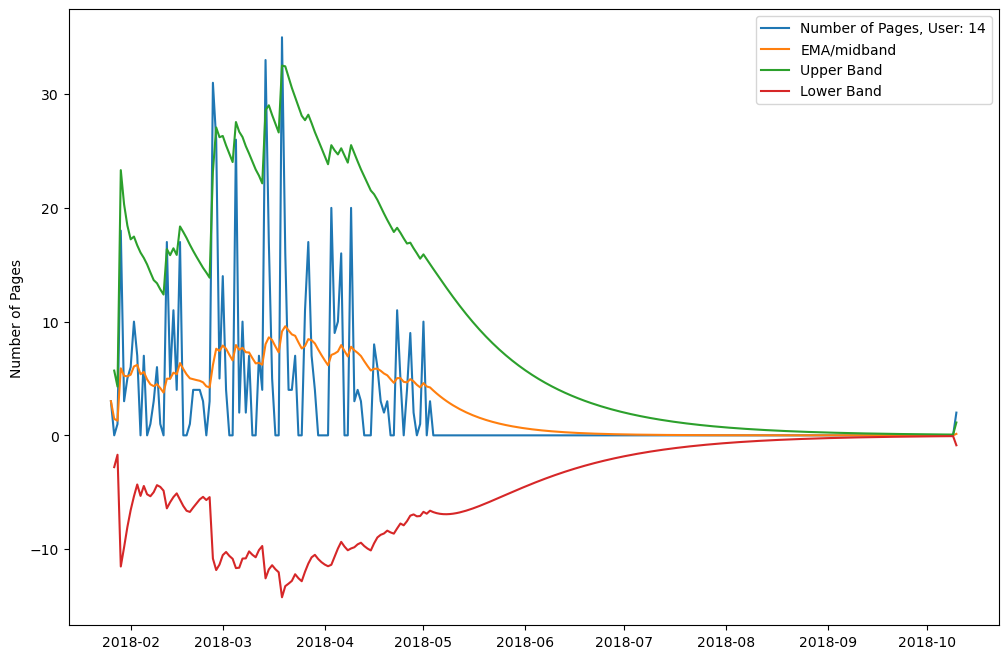

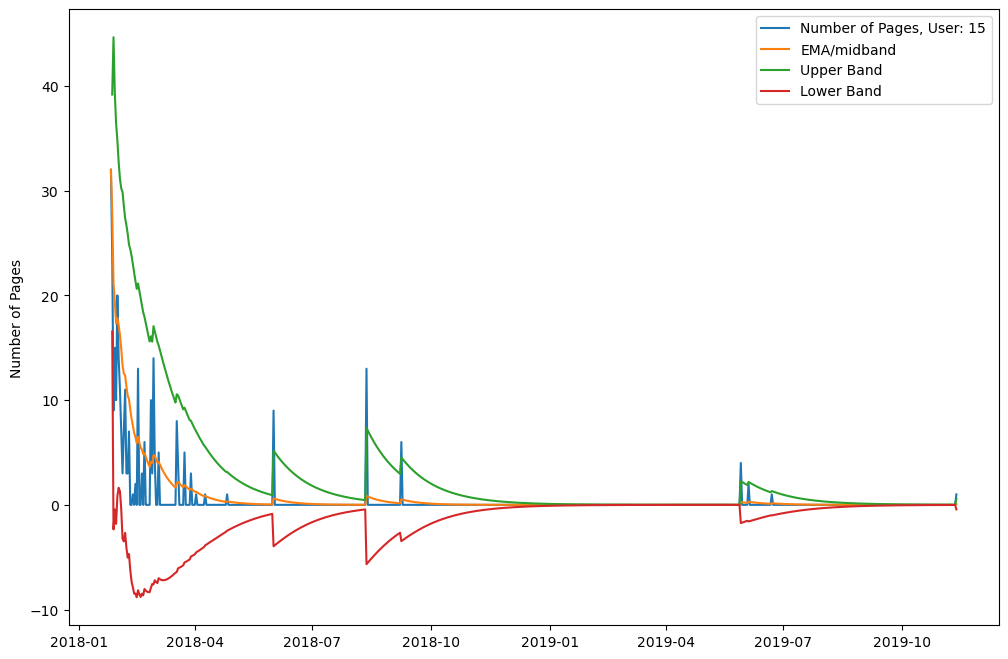

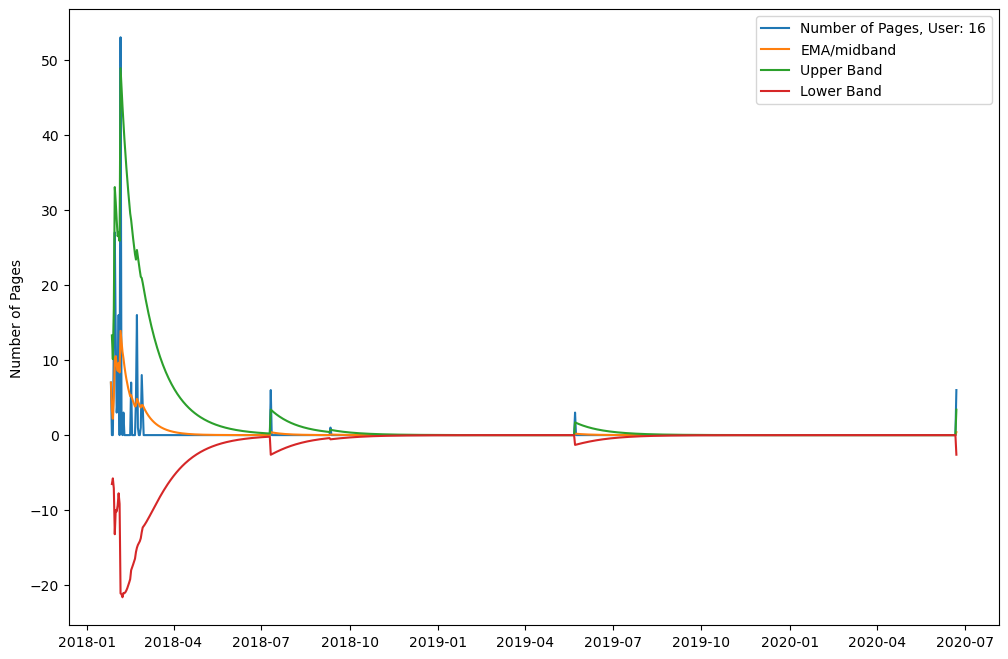

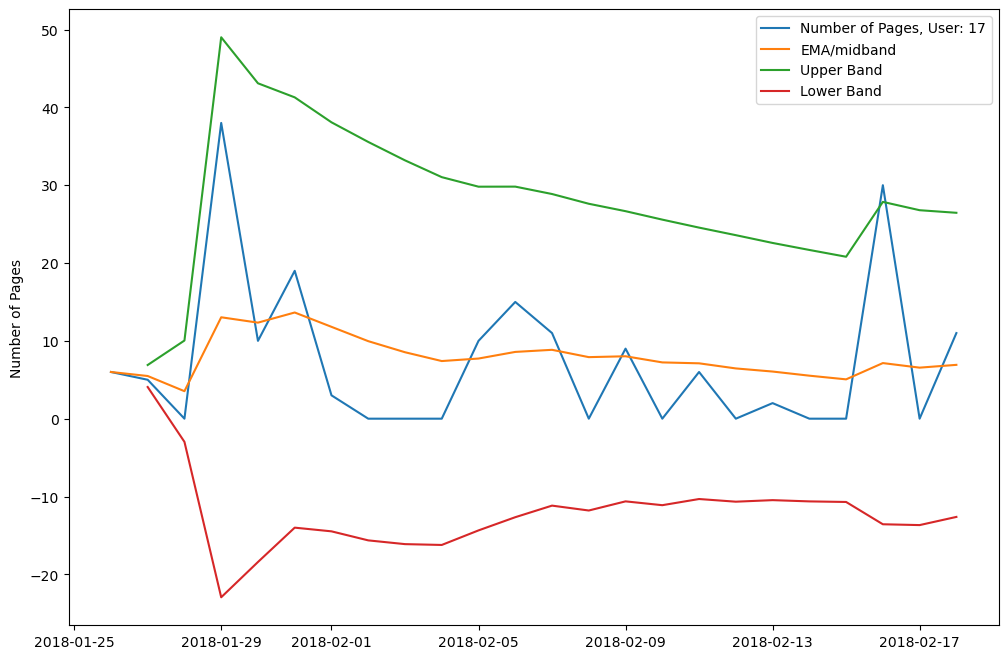

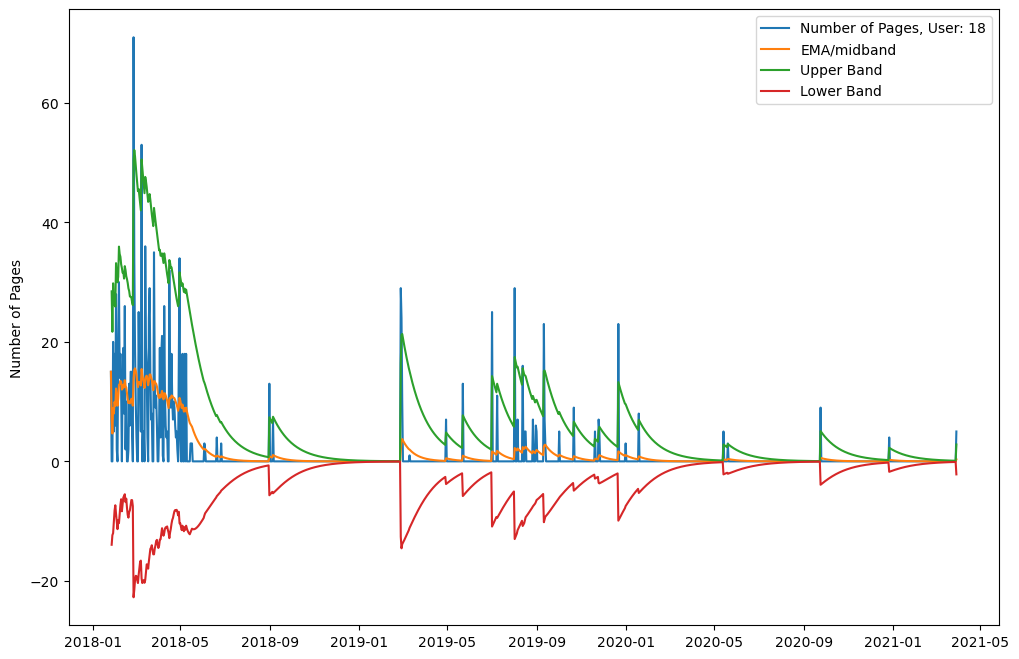

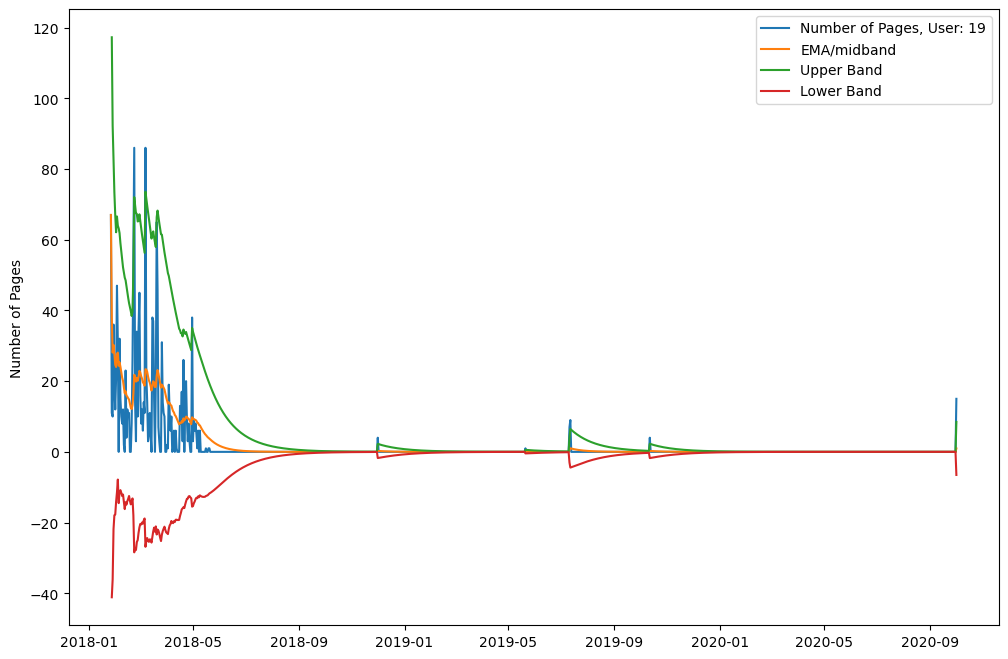

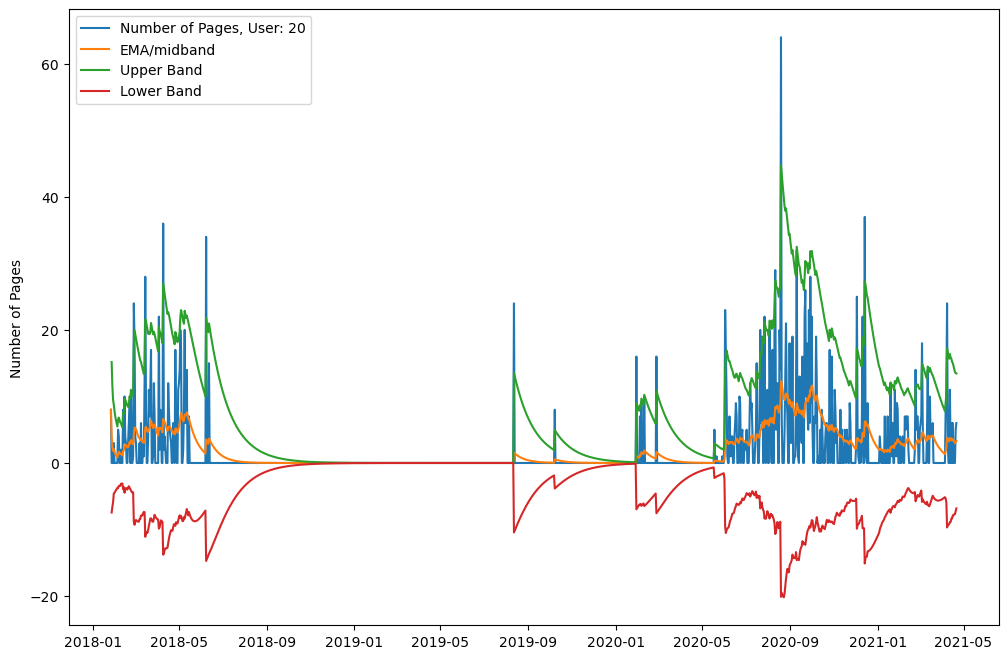

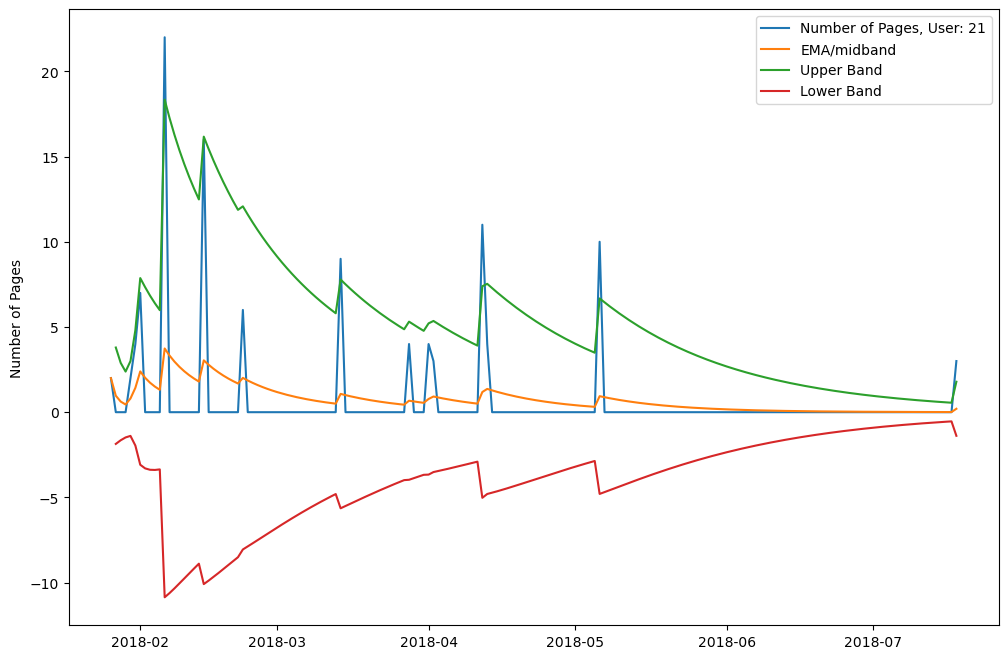

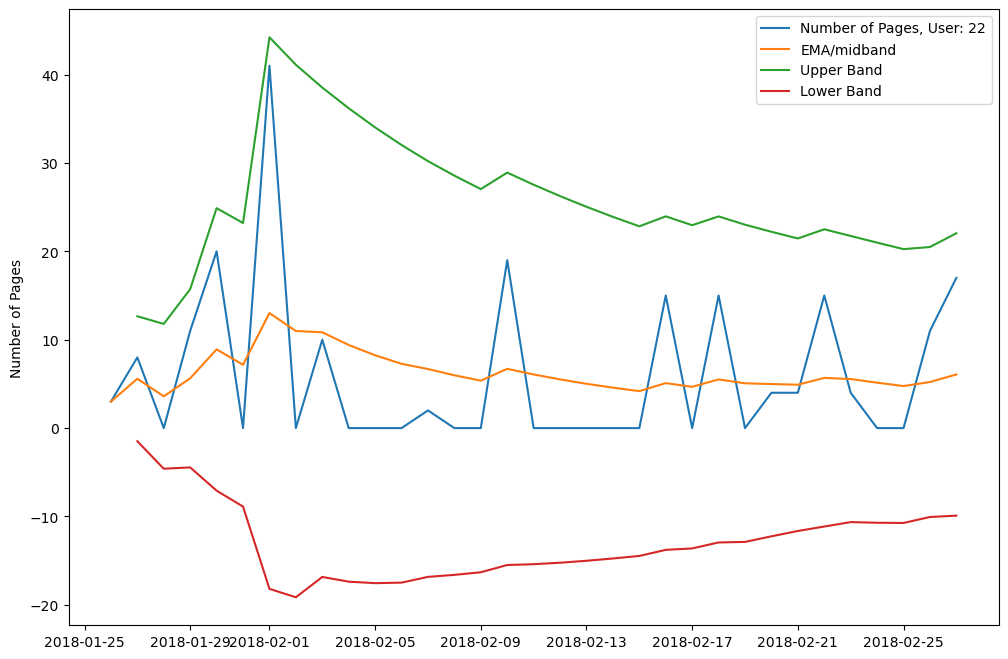

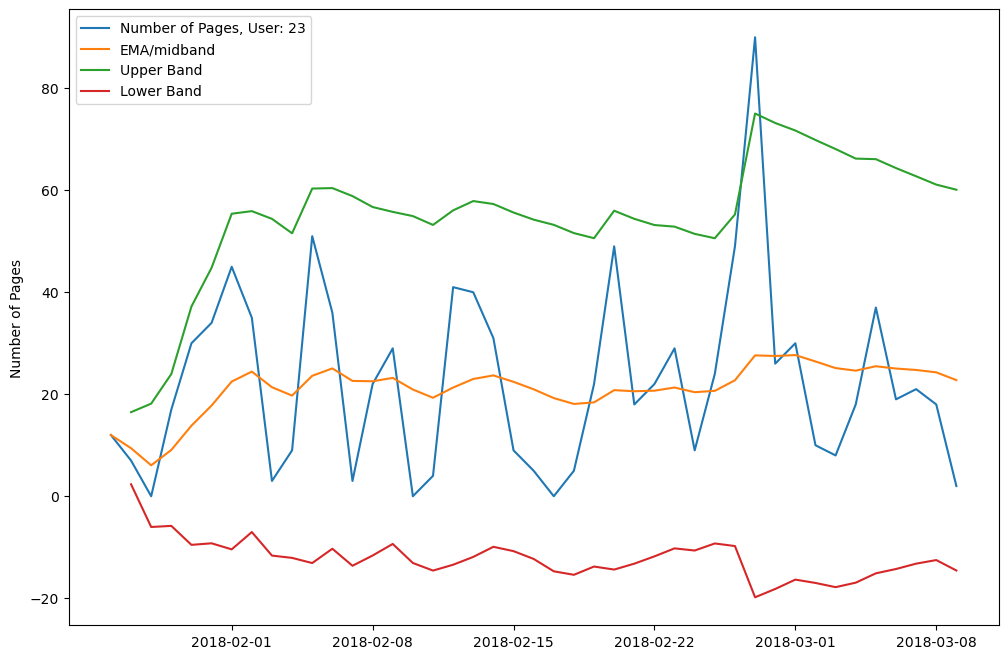

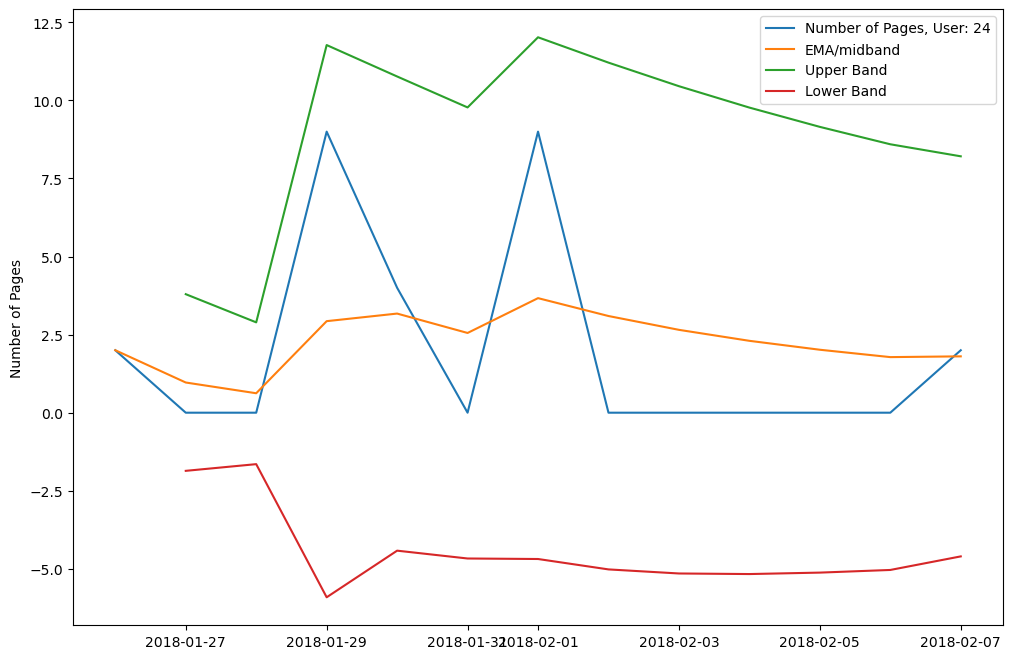

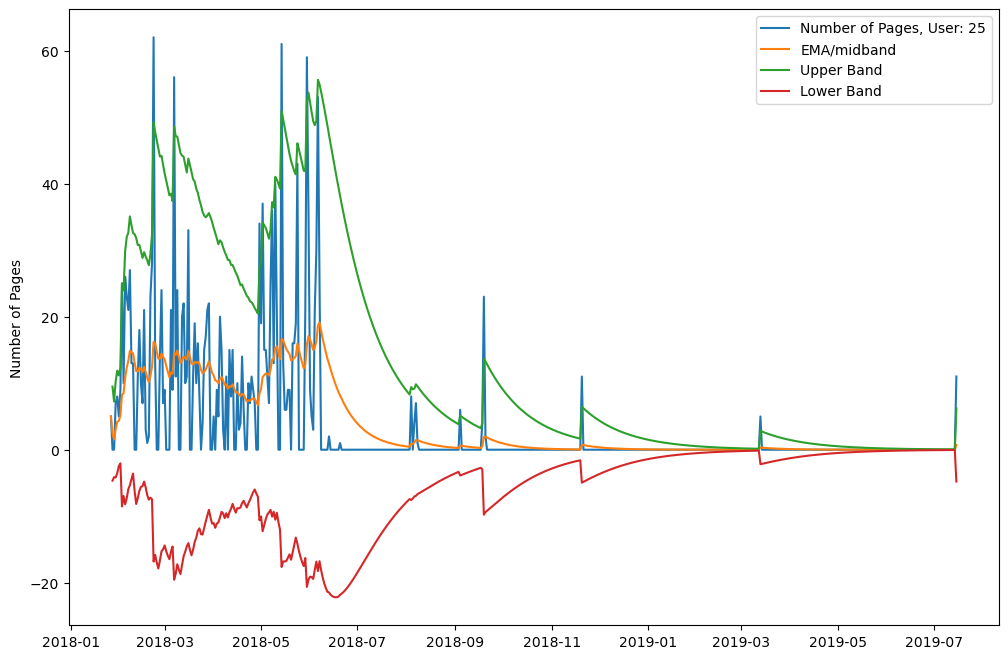

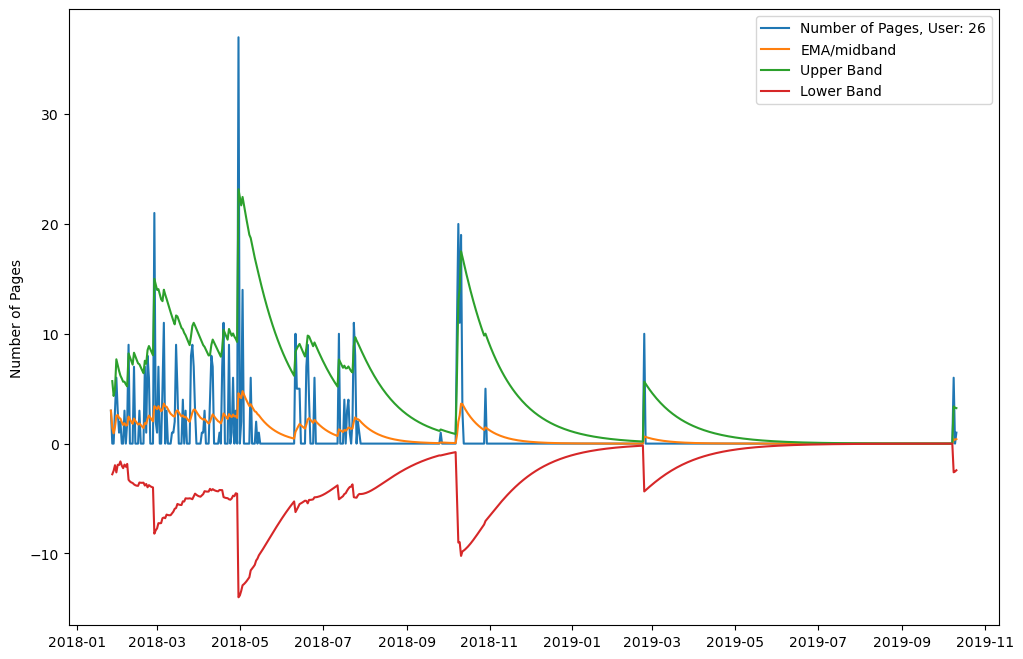

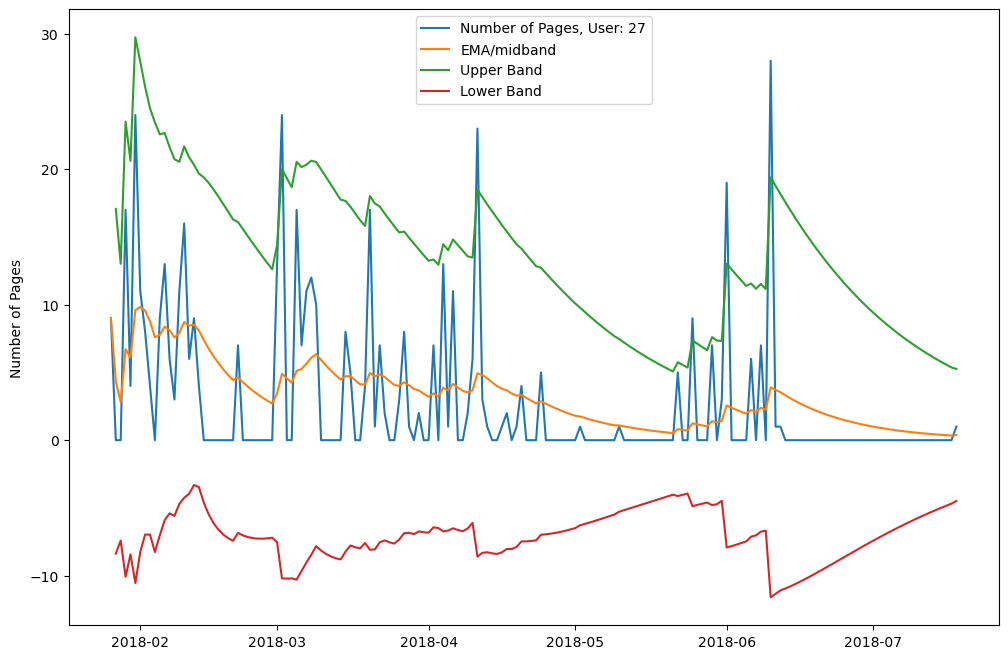

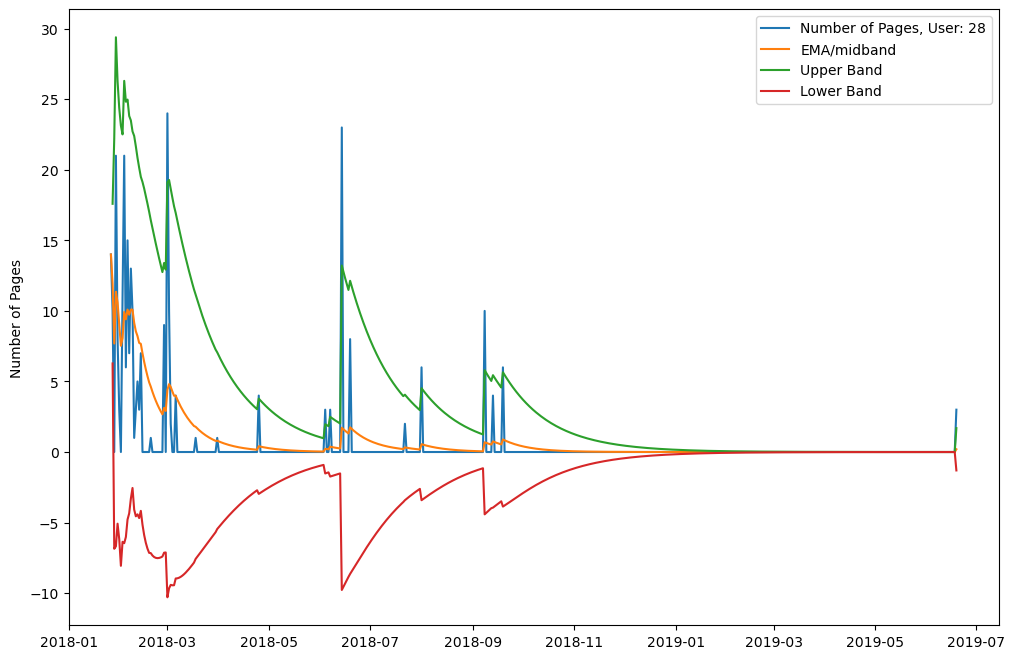

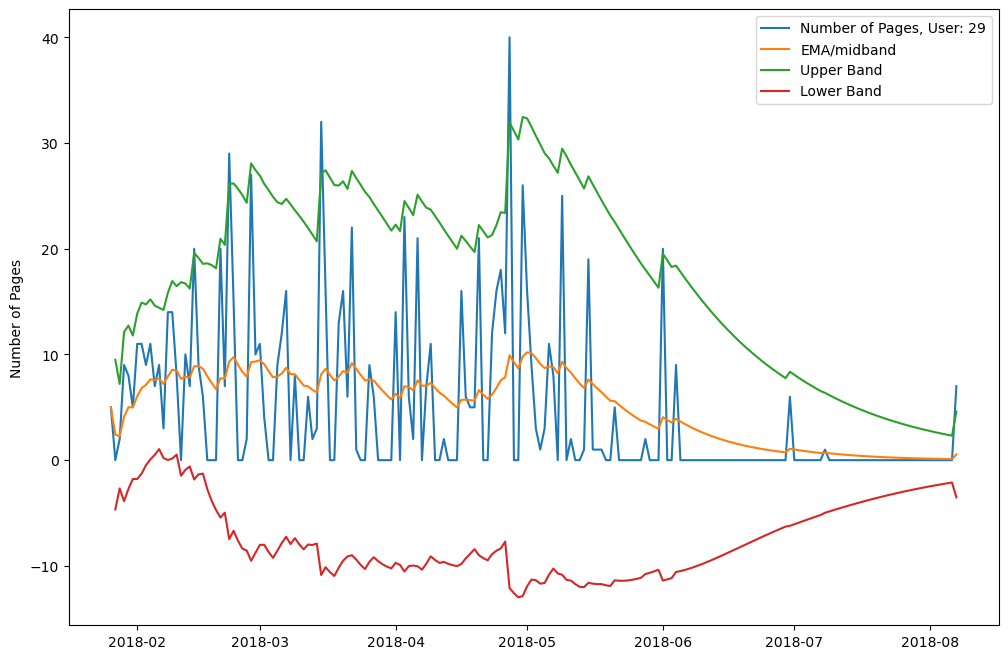

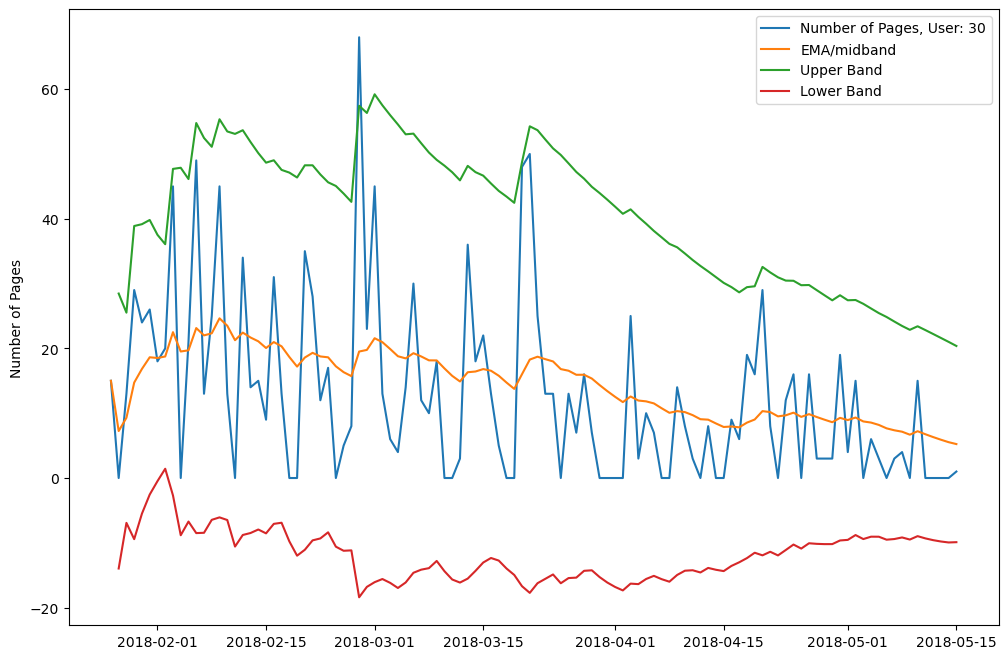

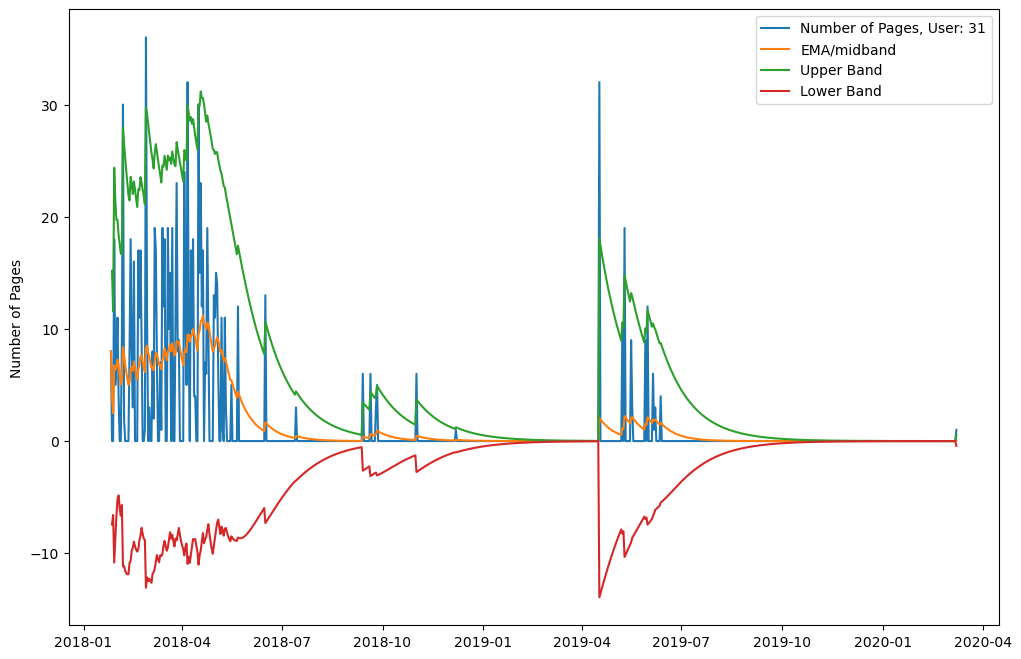

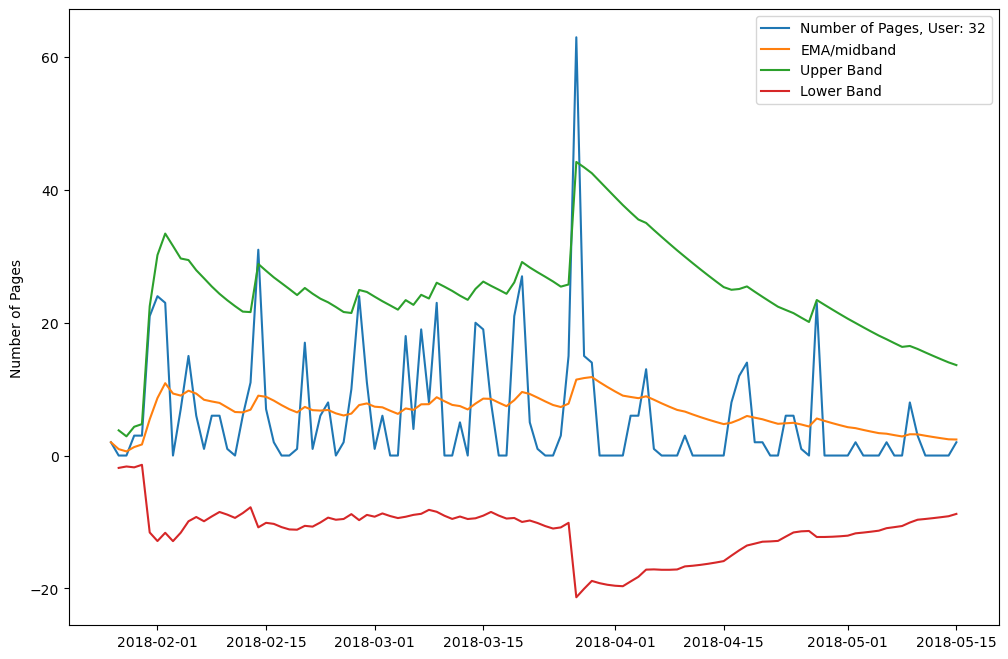

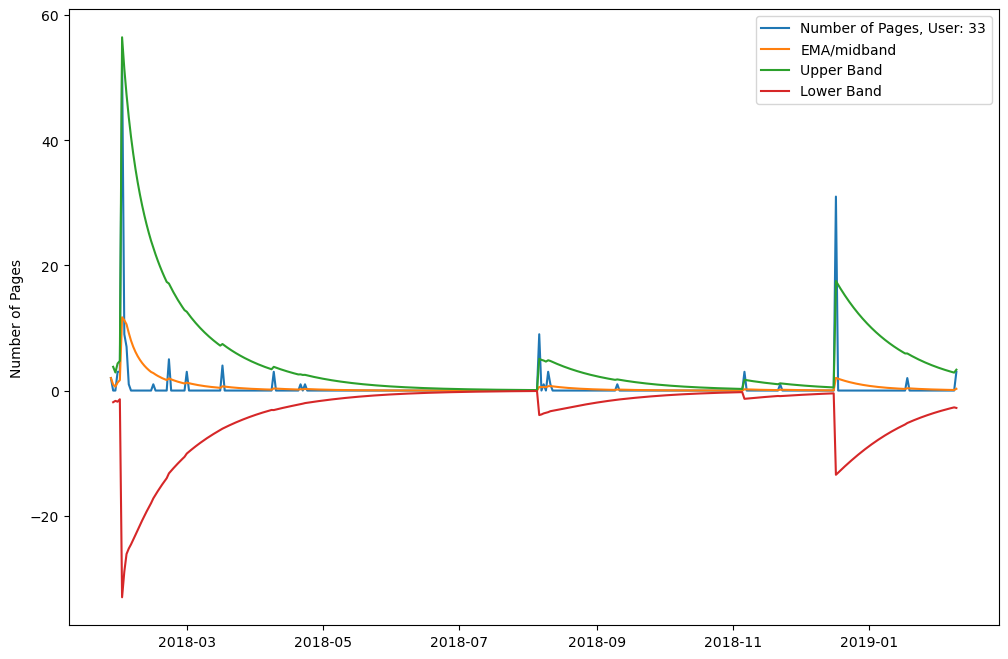

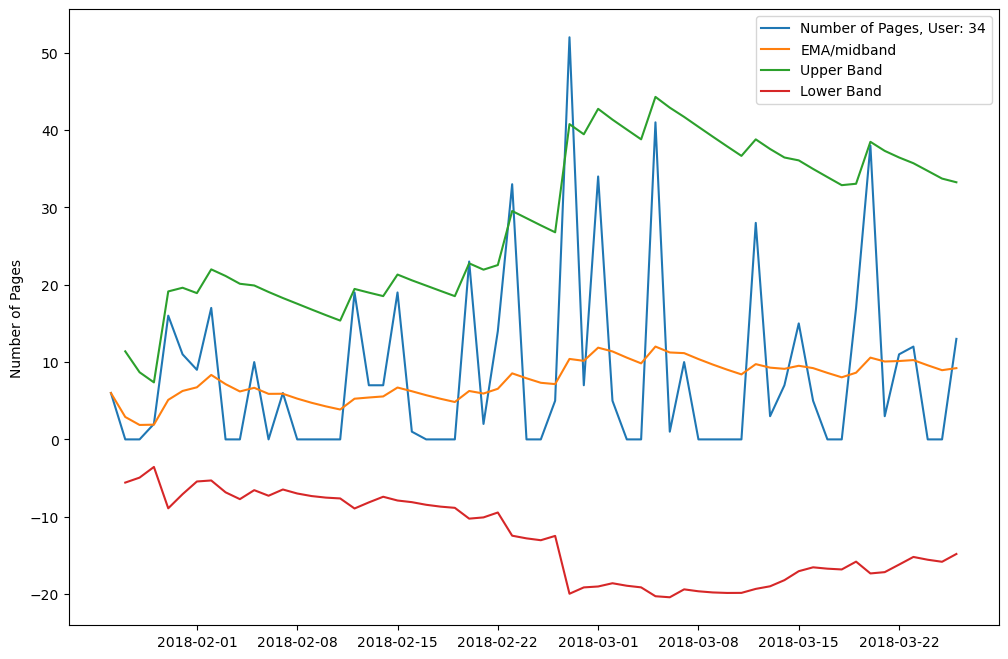

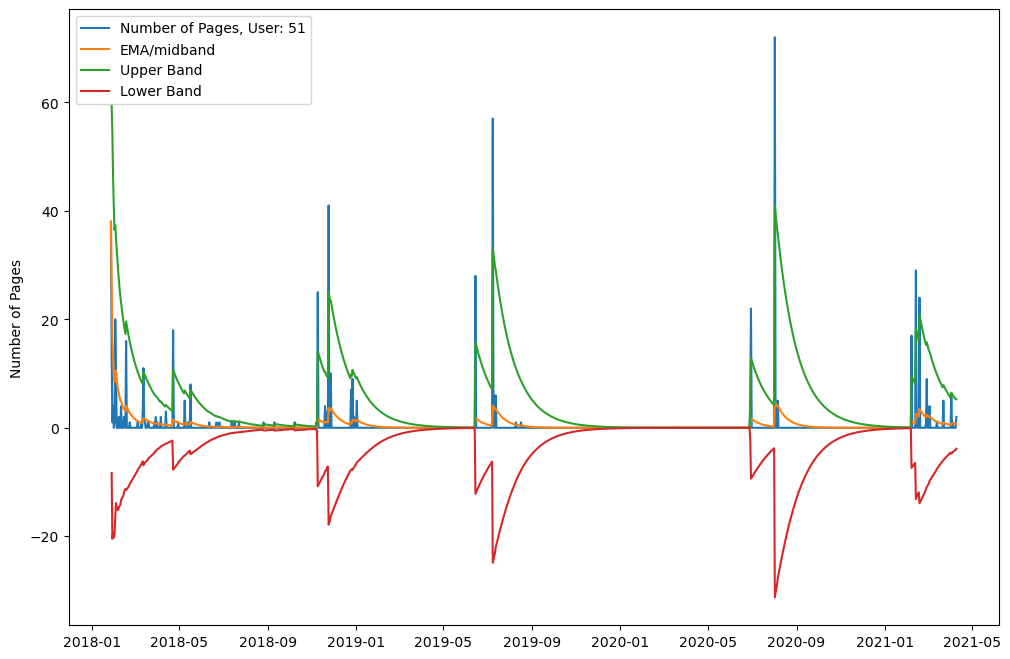

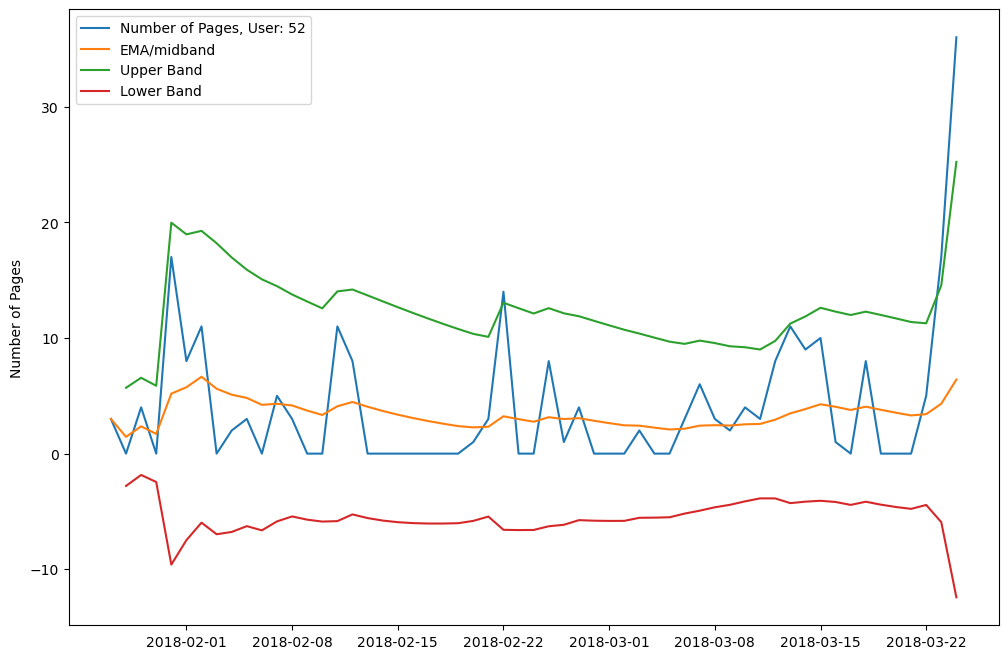

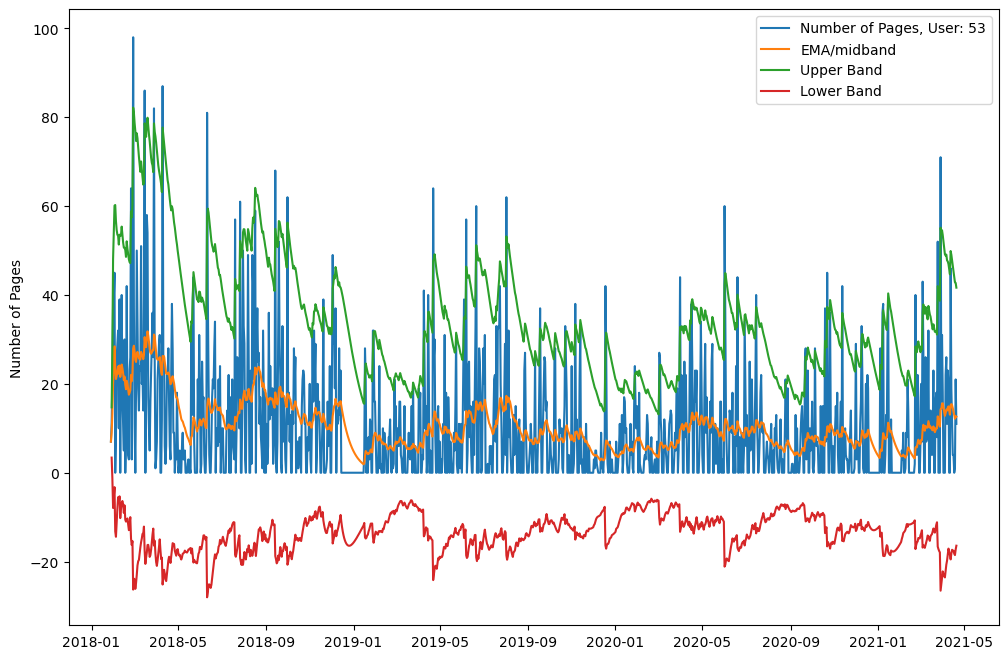

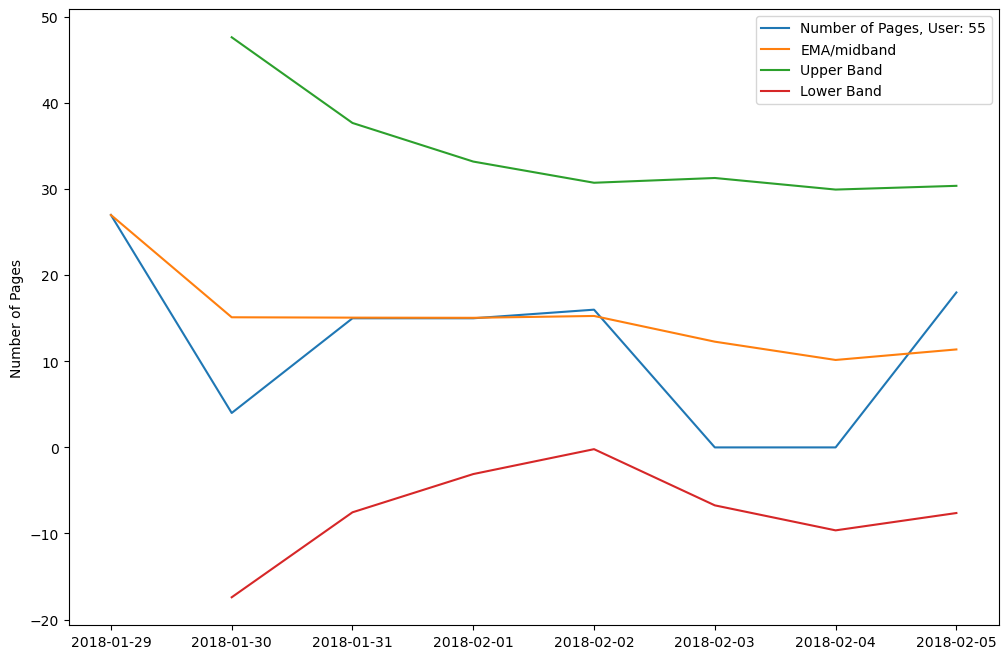

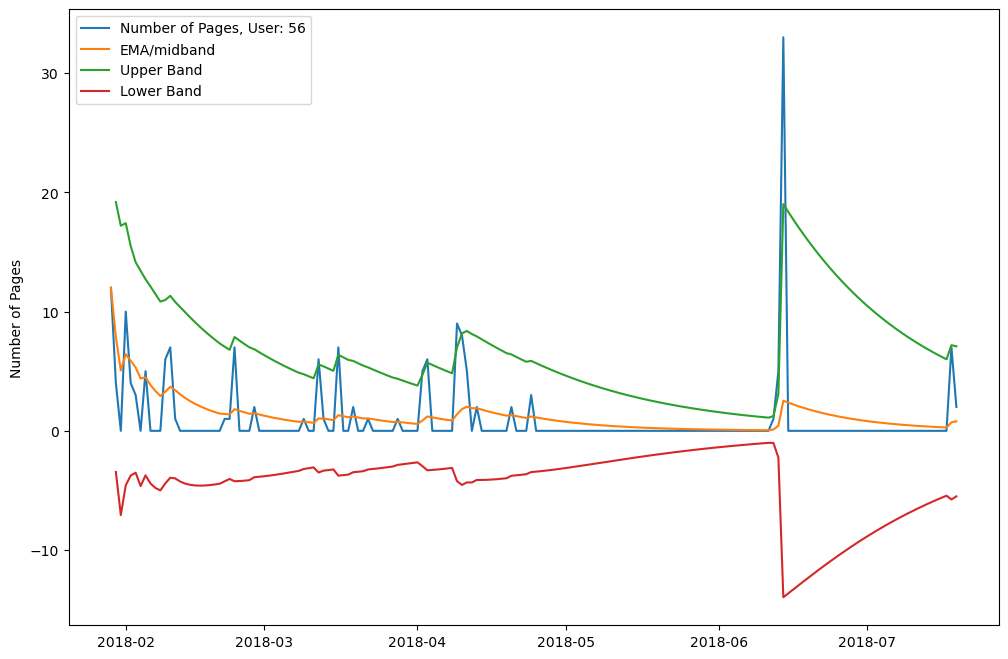

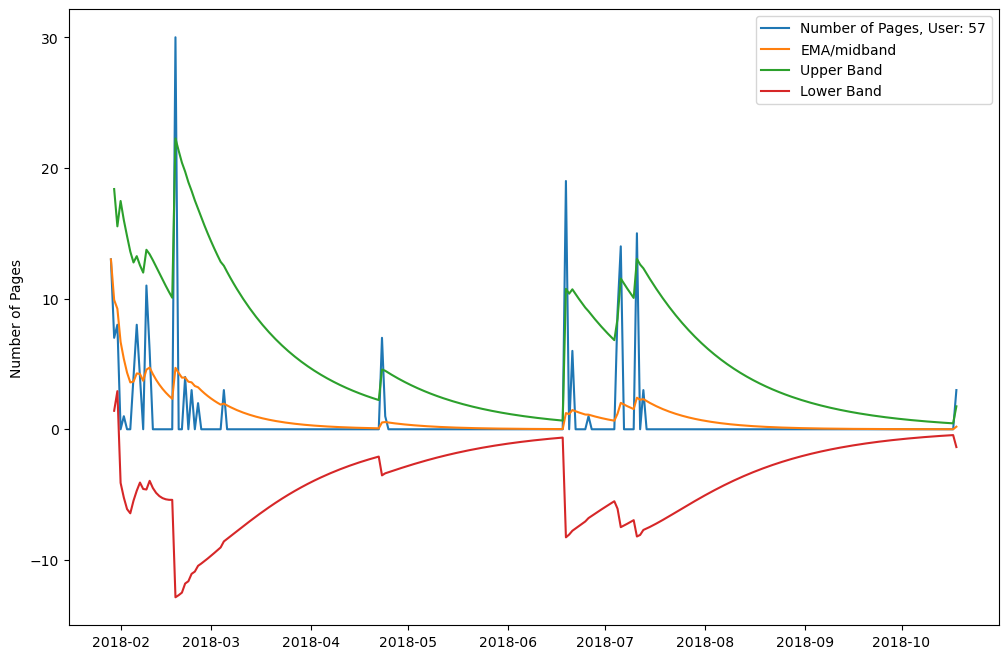

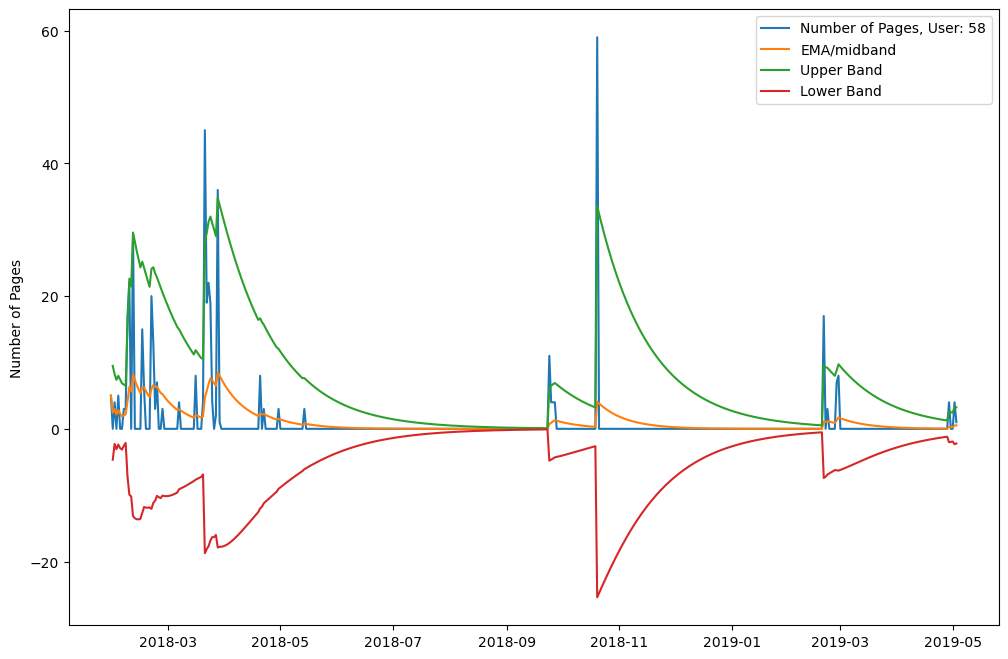

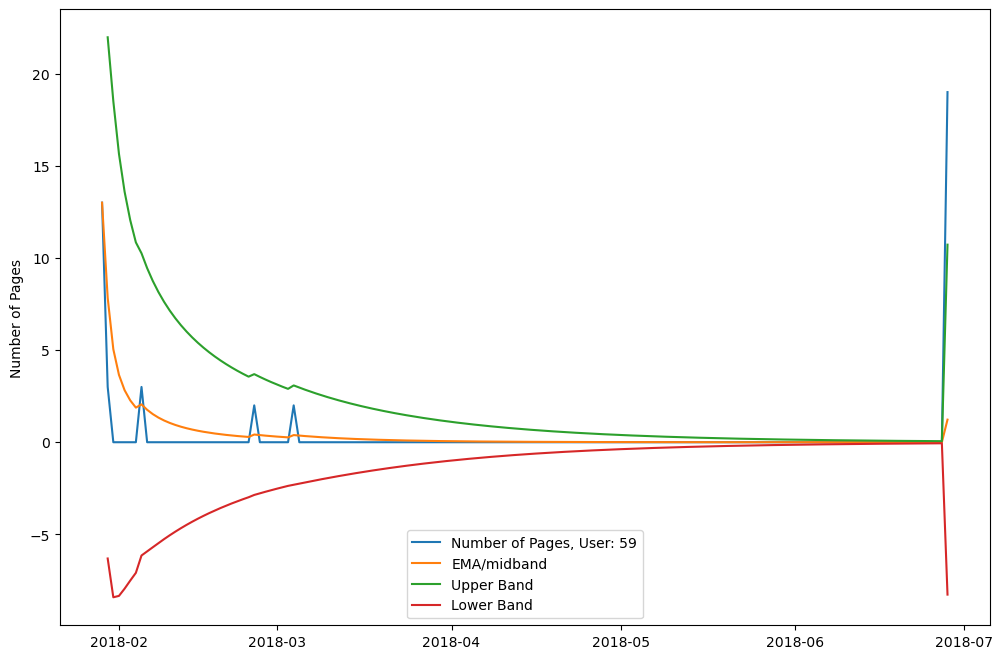

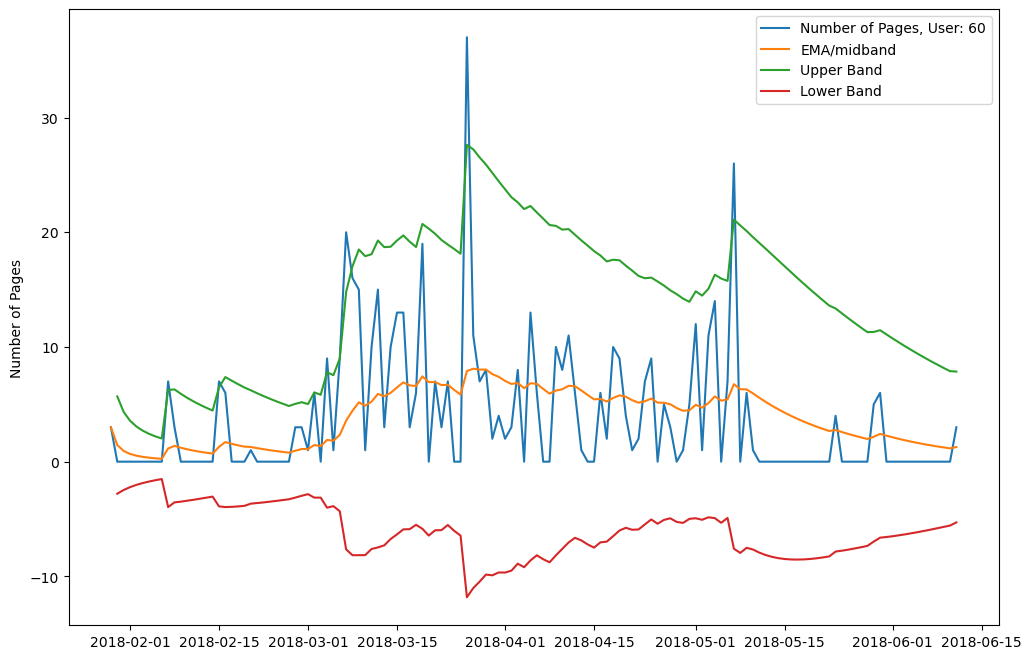

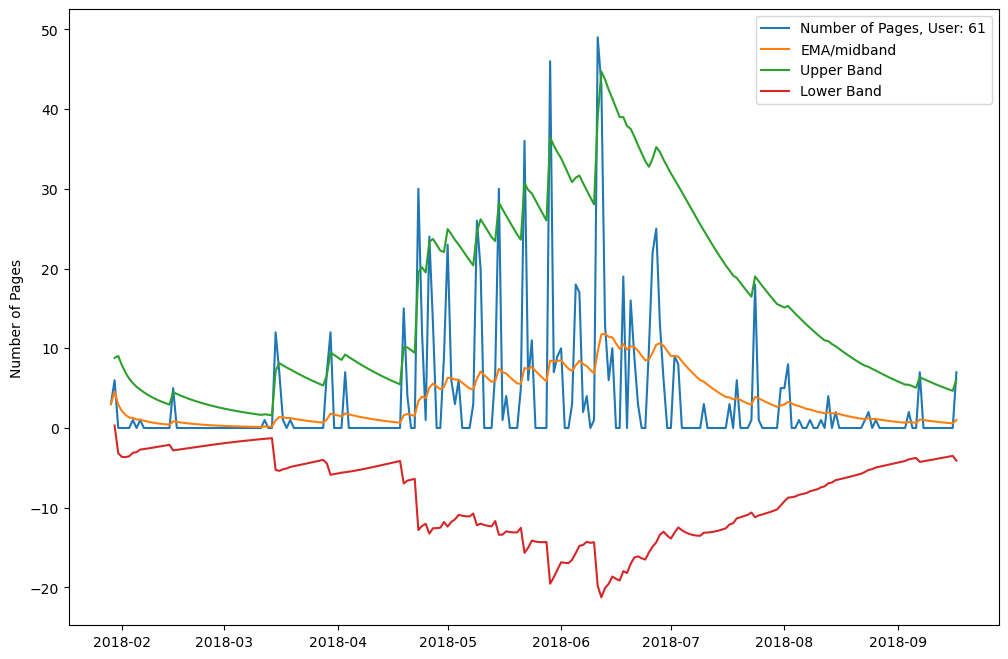

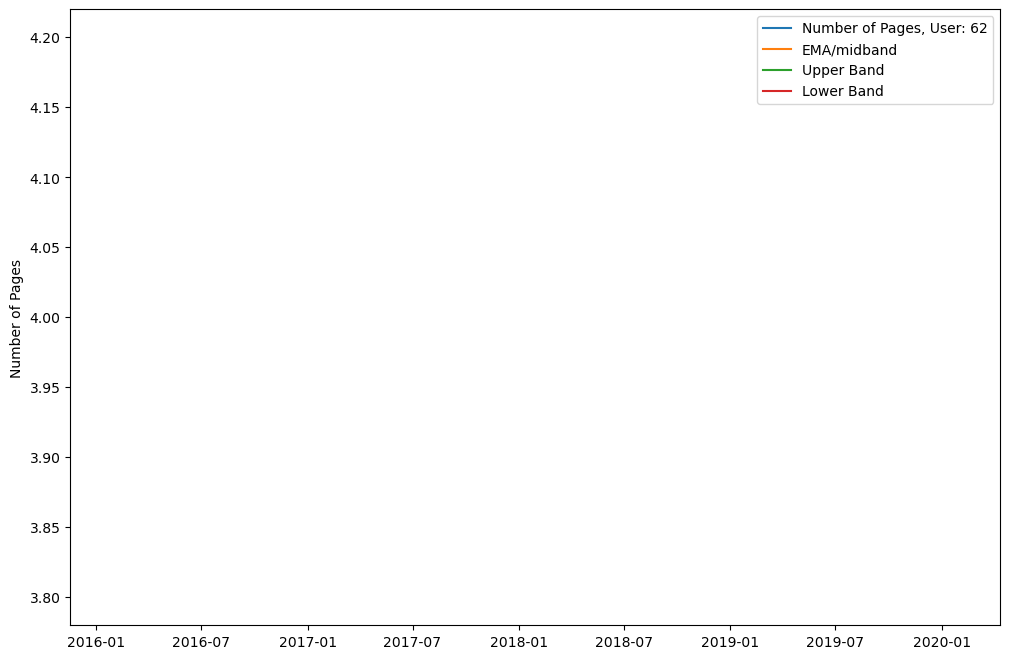

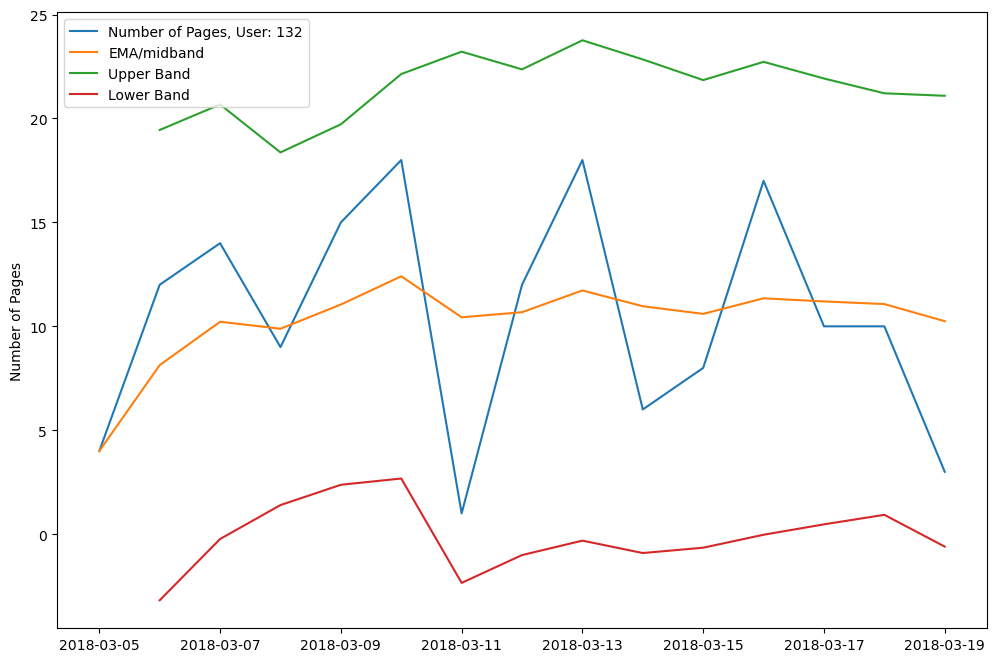

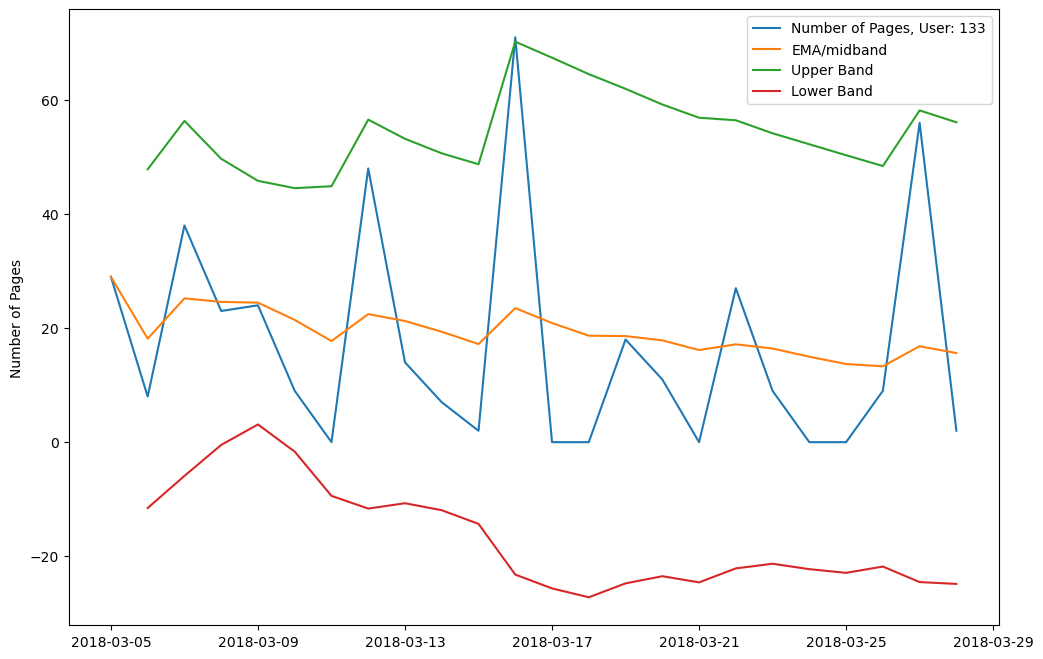

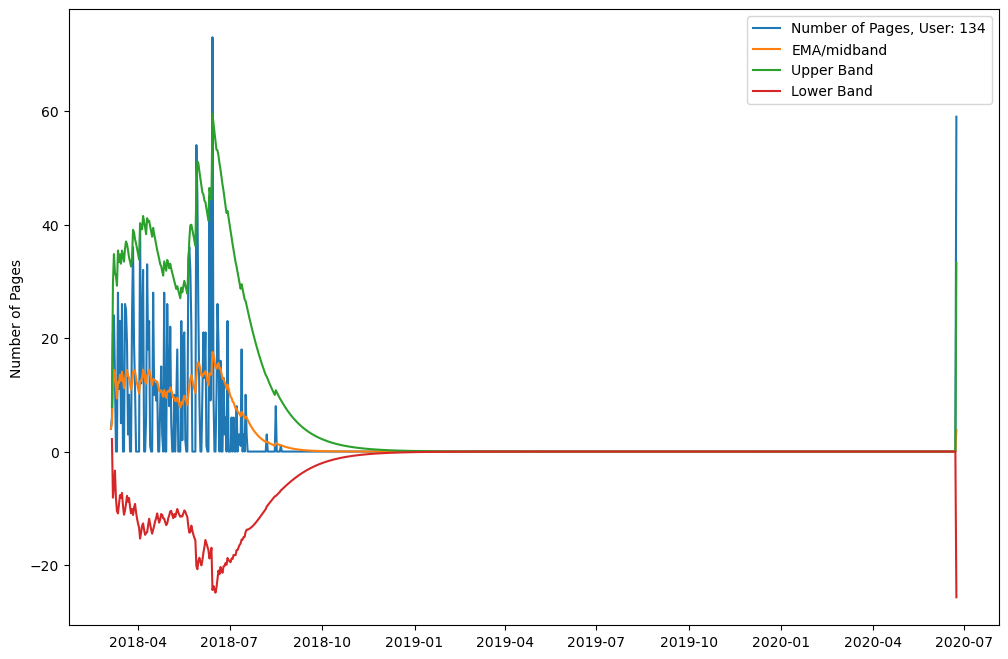

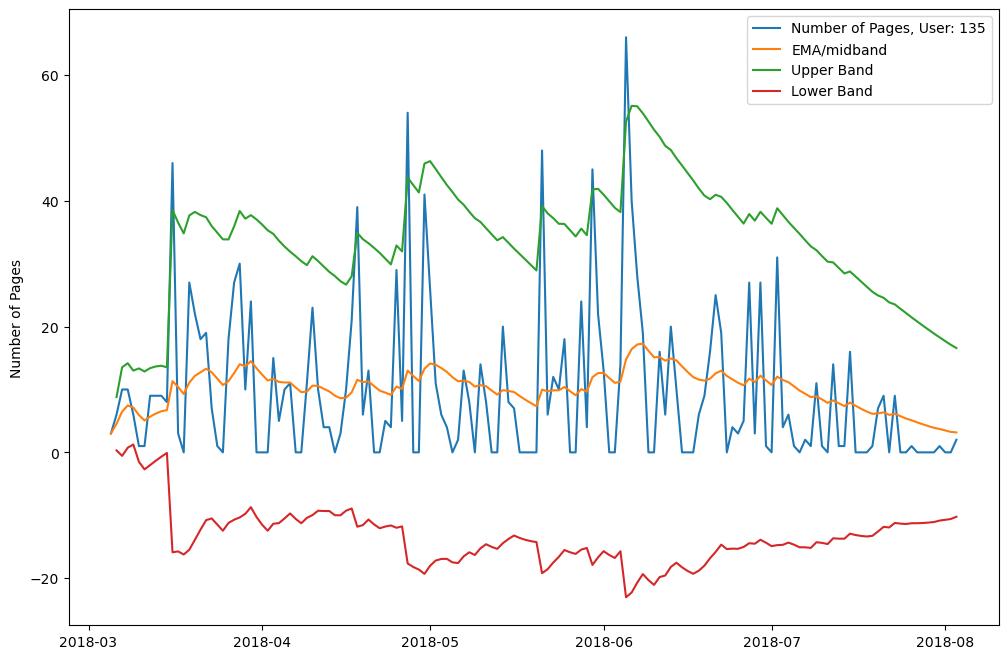

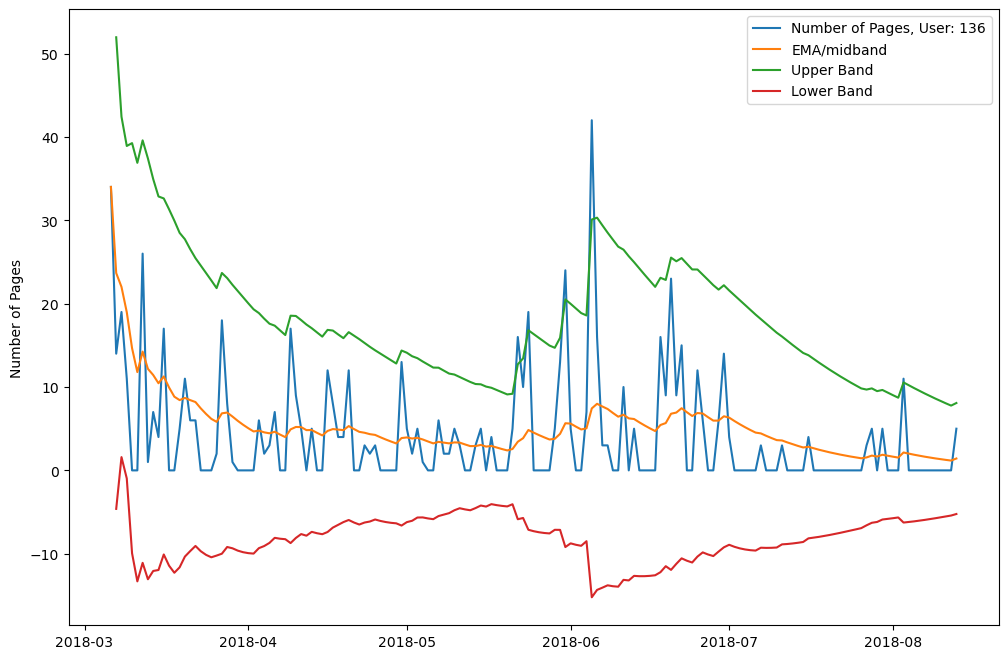

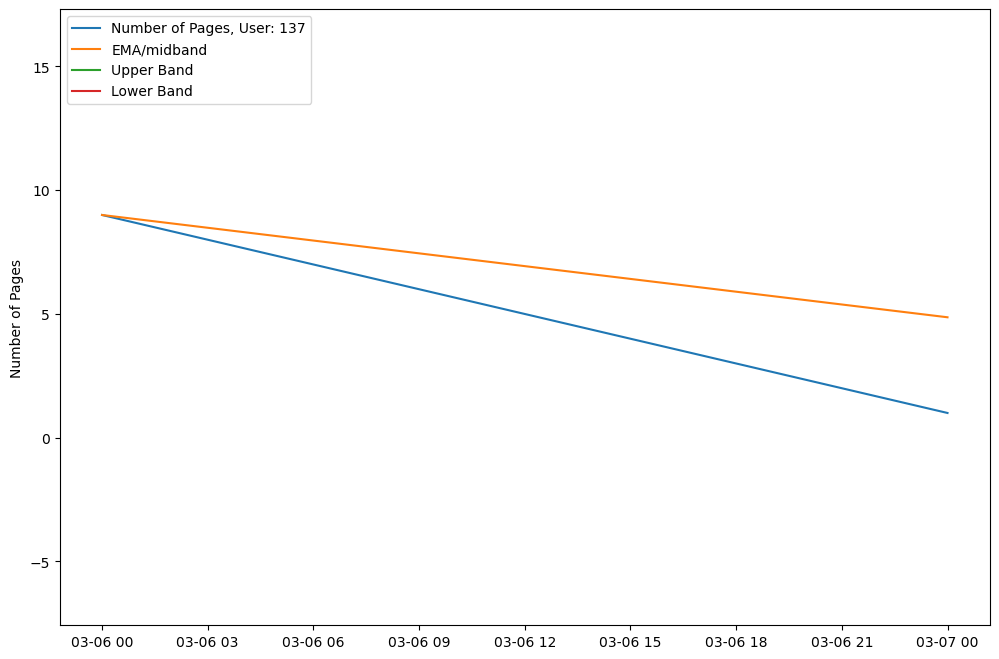

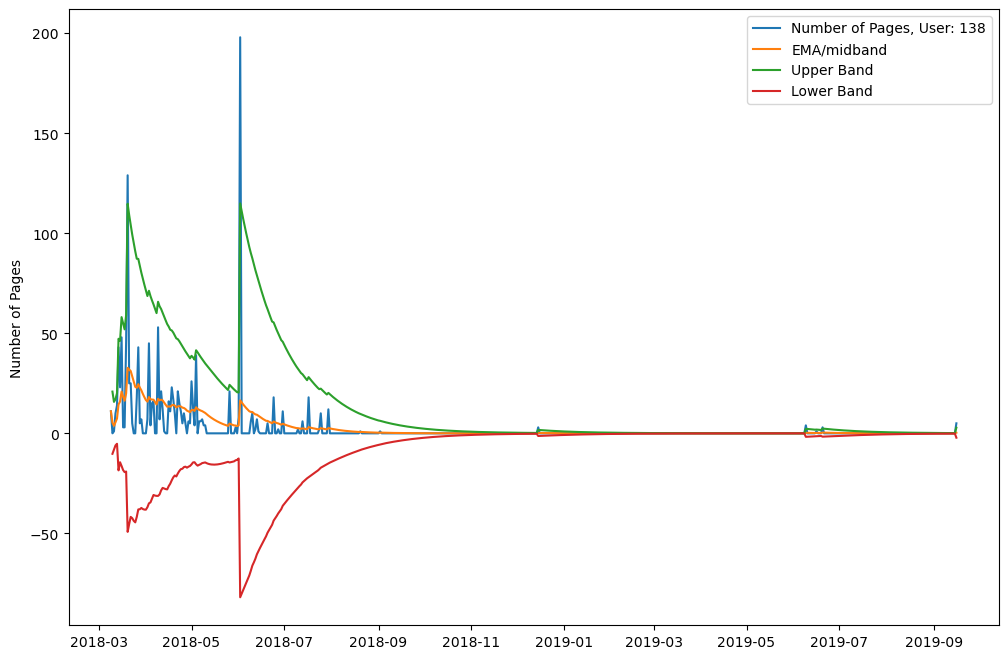

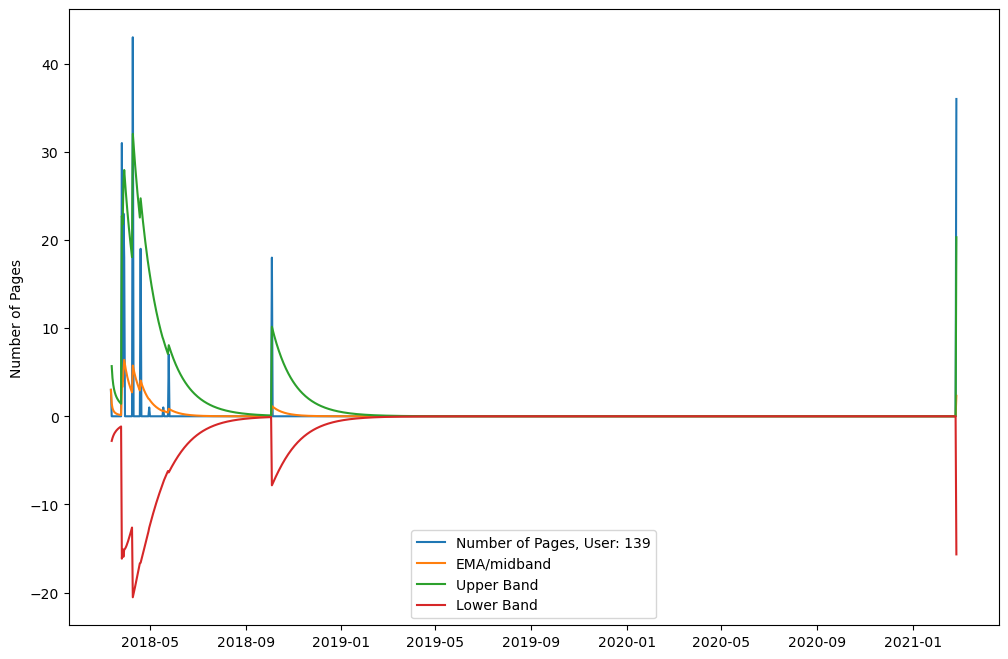

In [19]:
span = 30
weight = 2

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight, plot=True)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [15]:
anomalies


pages_one_user   midband         ub         lb     pct_b  user_id
date                                                                         
2018-02-20              54  6.456745  35.718248 -22.804758  1.312386        1
2018-03-19              35  9.304089  32.368632 -13.760453  1.057044        1
2018-05-04              27  7.179313  24.736171 -10.377545  1.064471        1
2018-05-11              27  8.141119  26.687629 -10.405390  1.008421        1
2018-05-29              68  9.612443  44.787234 -25.562347  1.329963        1
...                    ...       ...        ...        ...       ...      ...
2019-09-16               5  0.323617   2.824395  -2.177160  1.434986      138
2018-03-26              31  3.283610  22.720802 -16.153583  1.212973      139
2018-04-09              43  5.754857  32.045196 -20.535482  1.208343      139
2018-10-04              18  1.161418  10.157128  -7.834291  1.435923      139
2021-02-26              36  2.322581  20.313213 -15.668052  1.435971      139

[449 rows x 6 columns]

In [17]:
anomalies.sort_values(by='pages_one_user', ascending=False)

pages_one_user    midband          ub          lb     pct_b  \
date                                                                      
2020-07-22             285  44.915959  192.499064 -102.667146  1.313386   
2018-06-02             198  16.484863  114.931779  -81.962052  1.421893   
2020-09-28             134  25.923935  100.785882  -48.938013  1.221836   
2020-07-20             133  26.590056  103.348621  -50.168510  1.193147   
2018-03-20             129  32.755142  114.773958  -49.263674  1.086724   
...                    ...        ...         ...         ...       ...   
2018-08-26               1   0.082770    0.679960   -0.514421  1.267954   
2018-09-10               1   0.094954    0.704241   -0.514332  1.242710   
2018-10-08               1   0.079190    0.630684   -0.472305  1.334832   
2019-05-21               1   0.064519    0.564305   -0.435267  1.435882   
2019-11-12               1   0.064527    0.564366   -0.435311  1.435775   

            user_id  
date                 
2020-07-22       11  
2018-06-02      138  
2020-09-28       11  
2020-07-20       11  
2018-03-20      138  
...             ...  
2018-08-26       51  
2018-09-10       51  
2018-10-08       51  
2019-05-21       19  
2019-11-12       15  

[449 rows x 6 columns]

In [18]:
anomalies.user_id.value_counts()

53     49
1      46
11     45
20     29
10     25
18     22
51     17
61     14
12     12
31     12
25     12
26     12
7      12
19     10
28      9
58      8
56      7
57      7
60      7
138     6
135     6
29      6
14      5
6       5
27      5
3       5
21      5
136     5
16      5
15      5
134     4
5       4
139     4
33      3
34      3
52      3
32      2
4       2
2       2
9       2
59      1
30      1
133     1
23      1
8       1
17      1
13      1
Name: user_id, dtype: int64

In [22]:
df.user_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  51,  52,  53,  55,  56,
        57,  58,  59,  60,  61,  62, 132, 133, 134, 135, 136, 137, 138,
       139])

In [23]:
df.program_id.unique()

array([1, 4, 2, 3])

In [27]:
df_prog = df.groupby('program_id')
df_prog.

date      time  \
date                              
2018-01-26 2018-01-26  09:55:03   
2018-01-26 2018-01-26  09:56:02   
2018-01-26 2018-01-26  09:56:05   
2018-01-26 2018-01-26  09:56:06   
2018-01-26 2018-01-26  09:56:24   
2018-01-26 2018-01-26  10:02:42   
2018-01-26 2018-01-26  10:08:22   
2018-01-26 2018-01-26  10:08:34   
2018-01-26 2018-01-26  10:08:45   
2018-01-26 2018-01-26  10:08:55   
2018-01-26 2018-01-26  10:35:28   
2018-01-26 2018-01-26  10:35:29   
2018-01-26 2018-01-26  10:35:32   
2018-01-26 2018-01-26  10:35:33   
2018-01-26 2018-01-26  10:35:36   
2018-01-26 2018-01-26  11:46:42   
2018-01-26 2018-01-26  11:49:32   
2018-01-26 2018-01-26  11:50:53   
2018-01-26 2018-01-26  11:51:39   
2018-01-26 2018-01-26  12:11:00   

                                                         path  user_id  \
date                                                                     
2018-01-26                                                  /        1   
2018-01-26                                            java-ii        1   
2018-01-26                java-ii/object-oriented-programming        1   
2018-01-26                 slides/object_oriented_programming        1   
2018-01-26                          javascript-i/conditionals        2   
2018-01-26                             javascript-i/functions        9   
2018-01-26                           mkdocs/search_index.json       10   
2018-01-26                            git/merge-conflict-demo       10   
2018-01-26                           mkdocs/search_index.json       10   
2018-01-26                               git/working-in-teams       10   
2018-01-26                                                  /       15   
2018-01-26                                             spring       16   
2018-01-26                                           appendix       15   
2018-01-26                  spring/extra-features/file-upload       16   
2018-01-26                         appendix/capstone-workbook       15   
2018-01-26  appendix/further-reading/javascript/hoisting.html       30   
2018-01-26                             javascript-i/functions       34   
2018-01-26                  javascript-i/javascript-with-html       30   
2018-01-26                             javascript-i/functions       30   
2018-01-26                           mkdocs/search_index.json       30   

            cohort_id            ip      name  start_date    end_date  \
date                                                                    
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26        8.0  97.105.19.61    Arches  2014-02-04  2014-04-22   
2018-01-26       22.0  97.105.19.61  Badlands  2014-06-04  2014-08-22   
2018-01-26       22.0  97.105.19.61    Apollo  2015-03-30  2015-07-29   
2018-01-26       21.0  97.105.19.61    Balboa  2015-11-03  2016-03-11   
2018-01-26       21.0  97.105.19.61    Balboa  2015-11-03  2016-03-11   
2018-01-26       21.0  97.105.19.61    Balboa  2015-11-03  2016-03-11   
2018-01-26       21.0  97.105.19.61    Balboa  2015-11-03  2016-03-11   
2018-01-26       21.0  97.105.19.61   Mammoth  2016-09-26  2017-02-02   
2018-01-26       21.0  97.105.19.61   Niagara  2016-10-26  2017-03-09   
2018-01-26       21.0  97.105.19.61   Mammoth  2016-09-26  2017-02-02   
2018-01-26       21.0  97.105.19.61   Niagara  2016-10-26  2017-03-09   
2018-01-26       21.0  97.105.19.61   Mammoth  2016-09-26  2017-02-02   
2018-01-26       22.0  97.105.19.61       Ada  2019-02-04  2019-06-16   
2018-01-26       22.0  97.105.19.61     Bayes  2019-08-19  2020-01-30   
2018-01-26       22.0  97.105.19.61       Ada  2019-02-04  2019-06-16   
2018-01-26       22.0  97.105.19.61       Ada  2019-02-04  2019-06-16   
2018-01-26       22.0  97.105.19.61       Ada  2019-02-04  2019-06-16   

          

In [28]:
df_agg = df.groupby('program_id').agg(set)
df_agg

date  \
program_id                                                      
1           {2019-07-21 00:00:00, 2019-10-29 00:00:00, 201...   
2           {2019-07-21 00:00:00, 2020-09-27 00:00:00, 202...   
3           {2018-02-21 00:00:00, 2018-04-17 00:00:00, 201...   
4           {2018-02-21 00:00:00, 2018-04-14 00:00:00, 201...   

                                                         time  \
program_id                                                      
1           {12:29:20, 10:08:48, 09:38:26, 19:28:00, 19:33...   
2           {11:50:11, 09:38:26, 18:41:16, 17:58:02, 11:03...   
3           {09:36:36, 16:31:59, 14:19:33, 08:08:15, 08:27...   
4           {09:36:36, 17:34:35, 19:45:52, 14:13:13, 22:05...   

                                                         path  \
program_id                                                      
1           {8-clustering/End_to_End_Clustering, databases...   
2           {nlp/acquire, javascript-ii/es6, 5-stats/sampl...   
3           {java-i, spring/fundamentals/form-model-bindin...   
4           {java-i, spring/fundamentals/form-model-bindin...   

                                                      user_id  \
program_id                                                      
1            {1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 19}   
2           {132, 134, 135, 136, 138, 139, 15, 16, 18, 20,...   
3                                  {34, 133, 137, 55, 59, 30}   
4                                                     {9, 10}   

                                                    cohort_id  \
program_id                                                      
1                                {1.0, 8.0, 21.0, 22.0, 28.0}   
2           {1.0, 13.0, 14.0, 16.0, 18.0, 21.0, 22.0, 23.0...   
3           {nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
4                                                {21.0, 22.0}   

                                                           ip  \
program_id                                                      
1           {173.174.222.66, 70.123.200.145, 97.105.19.61,...   
2           {174.207.3.185, 184.203.109.14, 75.54.32.20, 9...   
3           {71.42.140.139, 104.180.86.144, 97.105.19.61, ...   
4           {166.137.139.56, 166.137.118.83, 108.249.226.2...   

                                                         name  \
program_id                                                      
1           {Carlsbad, Ike, Arches, Lassen, Quincy, Kings,...   
2           {Yosemite, Sequoia, Jupiter, Luna, Betelgeuse,...   
3               {Curie, Easley, Florence, Bayes, Darden, Ada}   
4                                            {Balboa, Apollo}   

                                                   start_date  \
program_id                                                      
1           {2015-02-03, 2014-06-04, 2014-02-04, 2016-07-1...   
2           {2014-02-04, 2018-11-05, 2020-02-24, 2018-05-2...   
3           {2019-08-19, 2020-07-13, 2021-03-15, 2020-12-0...   
4                                    {2015-03-30, 2015-11-03}   

                                                     end_date  \
program_id                                                      
1           {2014-04-22, 2016-09-15, 2014-08-22, 2017-05-2...   
2           {2018-10-11, 2018-05-17, 2020-07-29, 2014-02-0...   
3           {2021-09-03, 2021-06-08, 2020-01-30, 2021-01-1...   
4                                    {2016-03-11, 2015-07-29}   

                                                   created_at  \
program_id                                                      
1           {2017-02-06 17:49:10, 2016-07-18 19:06:27, 201...   
2           {2019-01-20 23:18:57, 2021-03-03 21:50:49, 201...   
3           {2020-02-03 19:31:51, 2020-07-13 18:32:19, 201...   
4                                       {2016-06-14 19:52:26}   

                                                   updated_at deleted_at  
program_id                                                              

In [29]:
df_agg.user_id

program_id
1     {1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 19}
2    {132, 134, 135, 136, 138, 139, 15, 16, 18, 20,...
3                           {34, 133, 137, 55, 59, 30}
4                                              {9, 10}
Name: user_id, dtype: object